# Descriptive analysis

A shorter version of the analysis-and-visualisation notebook.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.display import display

In [29]:
# Sourced from the UCI website
from ucimlrepo import fetch_ucirepo 
  
spambase = fetch_ucirepo(id=94) 
  
full_X = spambase.data.features
full_y = spambase.data.targets 

full = full_X.join(full_y).drop_duplicates()
train, test = train_test_split(full, test_size=0.20, stratify=full['Class'], random_state=123)

y = pd.DataFrame(train.pop('Class')).reset_index(drop=True)
X = train.reset_index(drop=True)

In [54]:
# Full count
print(f"Full count: {len(full_X)}")
# Duplicate count
print(f"Duplicate count: {full_X.join(full_y).duplicated().sum()}")
# Training count
print(f"Training count: {len(X)}")

Full count: 4601
Duplicate count: 391
Training count: 3368


In [3]:
def wrap_model(model, scaler=StandardScaler):
    pipeline = make_pipeline(scaler(), model)
    return pipeline

## Basic Statistics

In [5]:
X.describe().T

count        mean         std  min   25%     50%  \
word_freq_make              3680.0    0.102313    0.298038  0.0   0.0   0.000   
word_freq_address           3680.0    0.219258    1.313899  0.0   0.0   0.000   
word_freq_all               3680.0    0.283668    0.507339  0.0   0.0   0.000   
word_freq_3d                3680.0    0.064459    1.378506  0.0   0.0   0.000   
word_freq_our               3680.0    0.308391    0.663691  0.0   0.0   0.000   
word_freq_over              3680.0    0.097891    0.262296  0.0   0.0   0.000   
word_freq_remove            3680.0    0.116802    0.397955  0.0   0.0   0.000   
word_freq_internet          3680.0    0.102313    0.370750  0.0   0.0   0.000   
word_freq_order             3680.0    0.086533    0.270506  0.0   0.0   0.000   
word_freq_mail              3680.0    0.239003    0.646337  0.0   0.0   0.000   
word_freq_receive           3680.0    0.060568    0.205876  0.0   0.0   0.000   
word_freq_will              3680.0    0.530788    0.836842  0.0   0.0   0.120   
word_freq_people            3680.0    0.090758    0.277087  0.0   0.0   0.000   
word_freq_report            3680.0    0.060511    0.344031  0.0   0.0   0.000   
word_freq_addresses         3680.0    0.048144    0.255906  0.0   0.0   0.000   
word_freq_free              3680.0    0.247872    0.783527  0.0   0.0   0.000   
word_freq_business          3680.0    0.141880    0.437182  0.0   0.0   0.000   
word_freq_email             3680.0    0.182995    0.520999  0.0   0.0   0.000   
word_freq_you               3680.0    1.657245    1.785195  0.0   0.0   1.310   
word_freq_credit            3680.0    0.083187    0.518008  0.0   0.0   0.000   
word_freq_your              3680.0    0.798563    1.178062  0.0   0.0   0.200   
word_freq_font              3680.0    0.126516    1.065765  0.0   0.0   0.000   
word_freq_000               3680.0    0.103927    0.352516  0.0   0.0   0.000   
word_freq_money             3680.0    0.093359    0.433603  0.0   0.0   0.000   
word_freq_hp                3680.0    0.551883    1.720530  0.0   0.0   0.000   
word_freq_hpl               3680.0    0.267389    0.921737  0.0   0.0   0.000   
word_freq_george            3680.0    0.790073    3.449678  0.0   0.0   0.000   
word_freq_650               3680.0    0.115179    0.499795  0.0   0.0   0.000   
word_freq_lab               3680.0    0.095973    0.592025  0.0   0.0   0.000   
word_freq_labs              3680.0    0.100182    0.449783  0.0   0.0   0.000   
word_freq_telnet            3680.0    0.060052    0.352939  0.0   0.0   0.000   
word_freq_857               3680.0    0.046269    0.328764  0.0   0.0   0.000   
word_freq_data              3680.0    0.096560    0.570878  0.0   0.0   0.000   
word_freq_415               3680.0    0.046970    0.329558  0.0   0.0   0.000   
word_freq_85                3680.0    0.103878    0.544773  0.0   0.0   0.000   
word_freq_technology        3680.0    0.096133    0.386794  0.0   0.0   0.000   
word_freq_1999              3680.0    0.134563    0.413715  0.0   0.0   0.000   
word_freq_parts             3680.0    0.013546    0.220946  0.0   0.0   0.000   
word_freq_pm                3680.0    0.070905    0.386405  0.0   0.0   0.000   
word_freq_direct            3680.0    0.065223    0.352895  0.0   0.0   0.000   
word_freq_cs                3680.0    0.041853    0.334257  0.0   0.0   0.000   
word_freq_meeting           3680.0    0.134120    0.788811  0.0   0.0   0.000   
word_freq_original          3680.0    0.045467    0.221396  0.0   0.0   0.000   
word_freq_project           3680.0    0.075774    0.644669  0.0   0.0   0.000   
word_freq_re                3680.0    0.304351    1.014123  0.0   0.0   0.000   
word_freq_edu               3680.0    0.182967    0.945605  0.0   0.0   0.000   
word_freq_table             3680.0    0.006193    0.082703  0.0   0.0   0.000   
word_freq_conference        3680.0    0.031462    0.289790  0.0   0.0   0.000   
char_freq_;                 3680.0    0.040974    0.254139  

## PCA

[0.11816178]


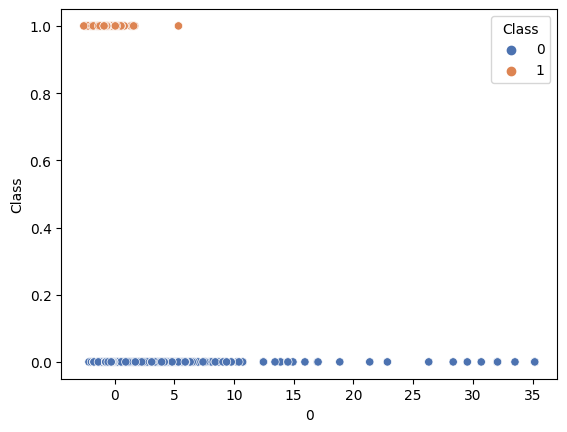

[0.11816178 0.05867519]


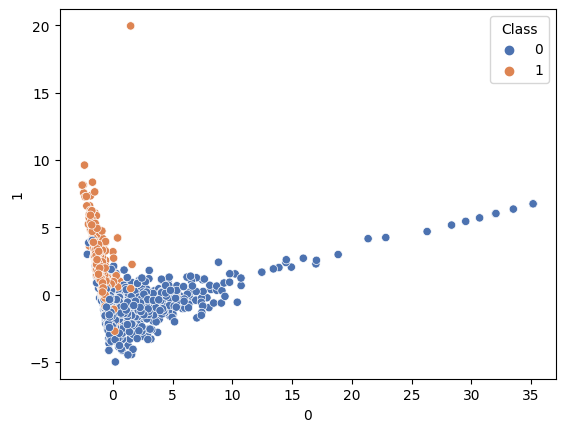

In [5]:
# Quick visualization with PCA
# Continued in separate notebook

pca = wrap_model(PCA(n_components=1)).fit(X)
pca_out = pd.DataFrame(pca.transform(X))
sns.scatterplot(pca_out, x=0, y=y['Class'],hue=y['Class'], palette='deep')
print(pca[1].explained_variance_ratio_)
plt.show()
pca = wrap_model(PCA(n_components=2)).fit(X)
pca_out = pd.DataFrame(pca.transform(X))
sns.scatterplot(pca_out, x=0, y=1, hue=y['Class'], palette='deep')
print(pca[1].explained_variance_ratio_)
plt.show()

## Correlations

In [51]:
corrs = X.corrwith(y['Class']).sort_values()

corr_cols = corrs.loc[lambda x: ((x > 0.1) | (x < -0.1))].index
corr_pos_cols = corrs.loc[lambda x: (x > 0.1)].index
corr_neg_cols = corrs.loc[lambda x: (x < -0.1)].index

pd.DataFrame({'full': corrs, 'abs': corrs.abs()}).sort_values(by='abs')

full       abs
word_freq_will             -0.010662  0.010662
word_freq_parts            -0.039495  0.039495
word_freq_table            -0.040583  0.040583
word_freq_report            0.049516  0.049516
word_freq_direct           -0.059439  0.059439
word_freq_3d                0.061472  0.061472
char_freq_;                -0.064641  0.064641
char_freq_[                -0.070403  0.070403
char_freq_#                 0.070935  0.070935
word_freq_conference       -0.085562  0.085562
word_freq_font              0.096335  0.096335
word_freq_address           0.097950  0.097950
word_freq_cs               -0.102515  0.102515
char_freq_(                -0.103634  0.103634
capital_run_length_average  0.105725  0.105725
word_freq_project          -0.109651  0.109651
word_freq_people            0.112041  0.112041
word_freq_415              -0.115732  0.115732
word_freq_857              -0.117497  0.117497
word_freq_data             -0.119617  0.119617
word_freq_pm               -0.125734  0.125734
word_freq_telnet           -0.129524  0.129524
word_freq_mail              0.138559  0.138559
word_freq_make              0.139061  0.139061
word_freq_meeting          -0.143852  0.143852
word_freq_technology       -0.144634  0.144634
word_freq_edu              -0.146806  0.146806
word_freq_original         -0.147551  0.147551
word_freq_lab              -0.148683  0.148683
word_freq_85               -0.149108  0.149108
word_freq_re               -0.149450  0.149450
word_freq_650              -0.159156  0.159156
word_freq_george           -0.166948  0.166948
word_freq_all               0.173795  0.173795
word_freq_labs             -0.177422  0.177422
word_freq_addresses         0.181693  0.181693
word_freq_credit            0.185133  0.185133
word_freq_email             0.192513  0.192513
capital_run_length_longest  0.193268  0.193268
word_freq_1999             -0.196042  0.196042
word_freq_internet          0.203103  0.203103
word_freq_over              0.208551  0.208551
word_freq_money             0.215821  0.215821
char_freq_!                 0.224968  0.224968
capital_run_length_total    0.227787  0.227787
word_freq_hpl              -0.235728  0.235728
word_freq_order             0.235937  0.235937
word_freq_our               0.249670  0.249670
word_freq_you               0.258998  0.258998
word_freq_business          0.267409  0.267409
word_freq_receive           0.271056  0.271056
word_freq_free              0.271480  0.271480
word_freq_hp               -0.272674  0.272674
char_freq_$                 0.324011  0.324011
word_freq_remove            0.327136  0.327136
word_freq_000               0.330326  0.330326
word_freq_your              0.399771  0.399771

In [10]:
# Chosing columns with correlation bigger than or equal to 0.1
corrs[corrs.abs().sort_values() >= 0.1].index

Index(['word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_1999',
       'word_freq_labs', 'word_freq_650', 'word_freq_85', 'word_freq_edu',
       'word_freq_re', 'word_freq_original', 'word_freq_meeting',
       'word_freq_telnet', 'word_freq_technology', 'word_freq_lab',
       'word_freq_pm', 'word_freq_data', 'word_freq_857', 'word_freq_415',
       'word_freq_cs', 'capital_run_length_average', 'word_freq_make',
       'word_freq_mail', 'word_freq_people', 'word_freq_credit',
       'word_freq_all', 'capital_run_length_longest', 'word_freq_email',
       'word_freq_addresses', 'word_freq_money', 'word_freq_internet',
       'word_freq_order', 'word_freq_receive', 'char_freq_!',
       'capital_run_length_total', 'word_freq_our', 'word_freq_over',
       'word_freq_you', 'word_freq_business', 'word_freq_free',
       'word_freq_remove', 'word_freq_000', 'char_freq_$', 'word_freq_your'],
      dtype='object')

In [6]:
# Find highly correlated features
corr_mat = X.corr().abs()
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(bool))
[column for column in upper.columns if any(upper[column] > 0.9)]
# Take out word_freq_415, too correlated with another column
upper

word_freq_make  word_freq_address  word_freq_all  \
word_freq_make                         NaN           0.028529       0.074361   
word_freq_address                      NaN                NaN       0.033203   
word_freq_all                          NaN                NaN            NaN   
word_freq_3d                           NaN                NaN            NaN   
word_freq_our                          NaN                NaN            NaN   
word_freq_over                         NaN                NaN            NaN   
word_freq_remove                       NaN                NaN            NaN   
word_freq_internet                     NaN                NaN            NaN   
word_freq_order                        NaN                NaN            NaN   
word_freq_mail                         NaN                NaN            NaN   
word_freq_receive                      NaN                NaN            NaN   
word_freq_will                         NaN                NaN            NaN   
word_freq_people                       NaN                NaN            NaN   
word_freq_report                       NaN                NaN            NaN   
word_freq_addresses                    NaN                NaN            NaN   
word_freq_free                         NaN                NaN            NaN   
word_freq_business                     NaN                NaN            NaN   
word_freq_email                        NaN                NaN            NaN   
word_freq_you                          NaN                NaN            NaN   
word_freq_credit                       NaN                NaN            NaN   
word_freq_your                         NaN                NaN            NaN   
word_freq_font                         NaN                NaN            NaN   
word_freq_000                          NaN                NaN            NaN   
word_freq_money                        NaN                NaN            NaN   
word_freq_hp                           NaN                NaN            NaN   
word_freq_hpl                          NaN                NaN            NaN   
word_freq_george                       NaN                NaN            NaN   
word_freq_650                          NaN                NaN            NaN   
word_freq_lab                          NaN                NaN            NaN   
word_freq_labs                         NaN                NaN            NaN   
word_freq_telnet                       NaN                NaN            NaN   
word_freq_857                          NaN                NaN            NaN   
word_freq_data                         NaN                NaN            NaN   
word_freq_415                          NaN                NaN            NaN   
word_freq_85                           NaN                NaN            NaN   
word_freq_technology                   NaN                NaN            NaN   
word_freq_1999                         NaN                NaN            NaN   
word_freq_parts                        NaN                NaN            NaN   
word_freq_pm                           NaN                NaN            NaN   
word_freq_direct                       NaN                NaN            NaN   
word_freq_cs                           NaN                NaN            NaN   
word_freq_meeting                      NaN                NaN            NaN   
word_freq_original                     NaN                NaN            NaN   
word_freq_project                      NaN                NaN            NaN   
word_freq_re                           NaN                NaN            NaN   
word_freq_edu                          NaN                NaN            NaN   
word_freq_table                        NaN                NaN            NaN   
word_freq_conference                   NaN                NaN            NaN   
char_freq_;                            NaN                NaN            NaN   
char_freq_(                 

## Distribution Visualization

In [6]:
X_cols_sorted = corrs.sort_values(ascending=False).index

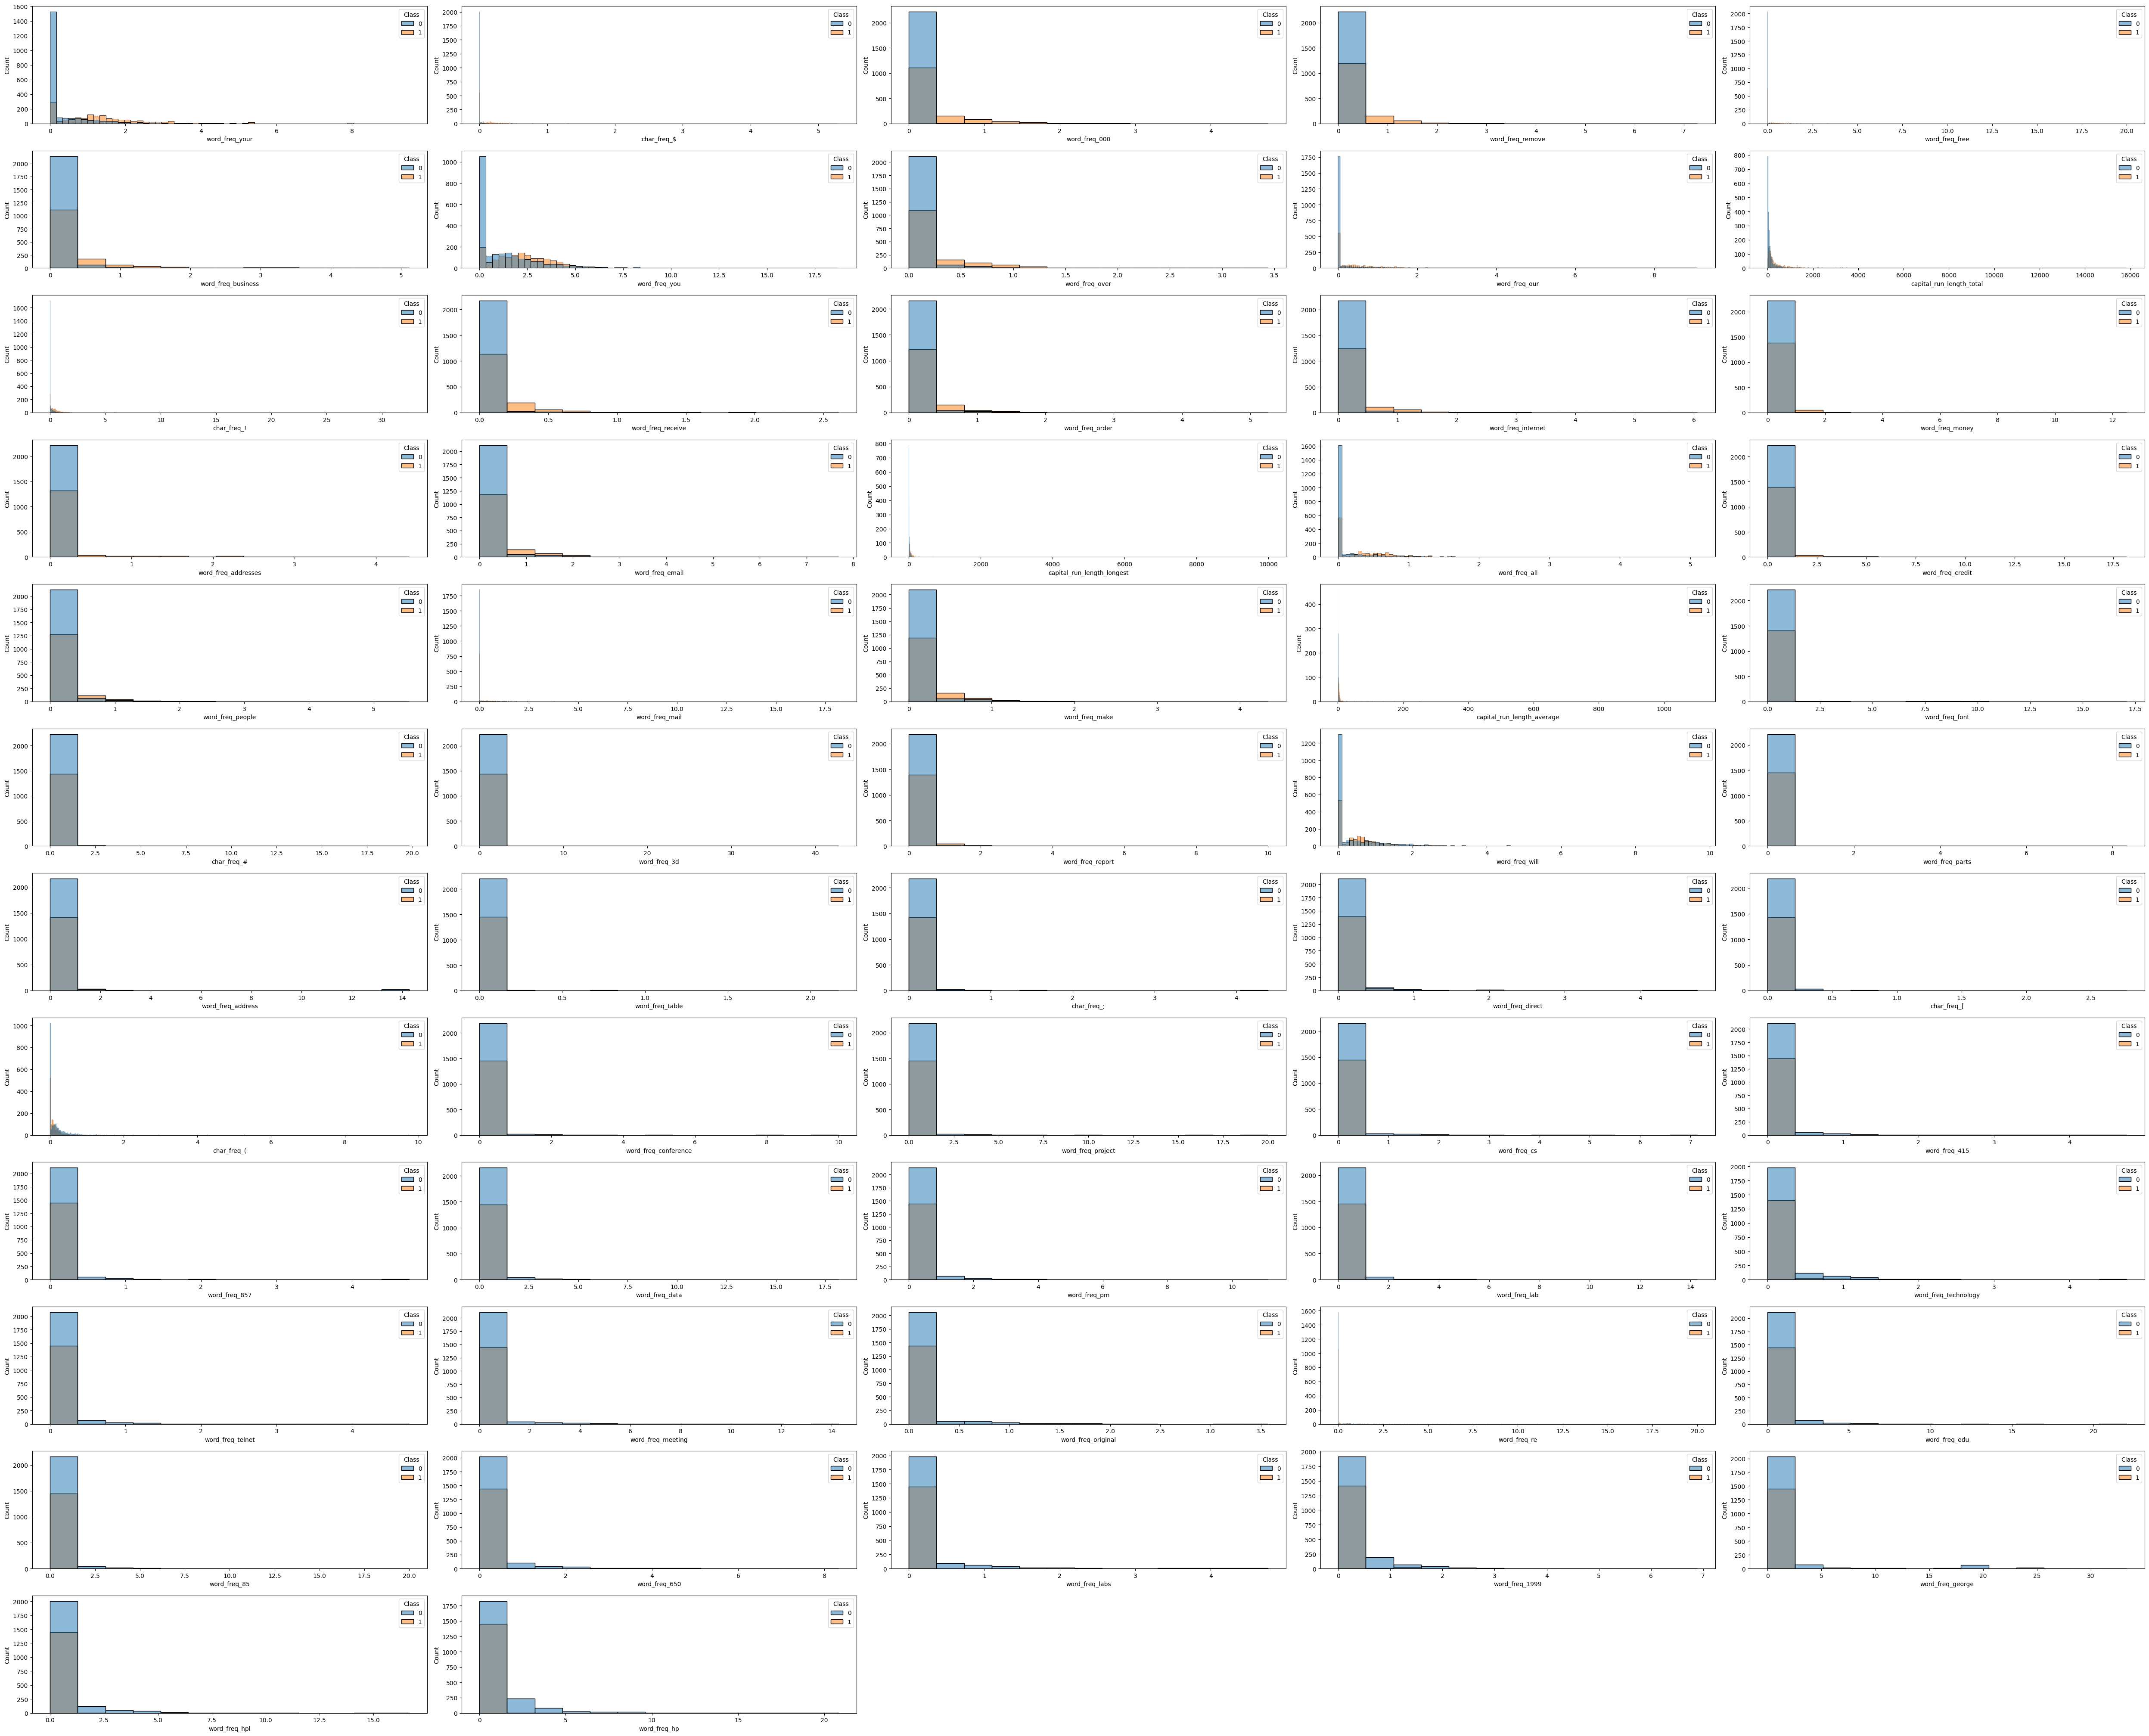

In [7]:
fig=plt.figure(figsize=(50,50))
for i, col in enumerate(X_cols_sorted):
    ax=fig.add_subplot(15,5,i+1)
    g = sns.histplot(
        X, x=col, hue=y['Class'], ax=ax,
    )
fig.tight_layout()
plt.show()

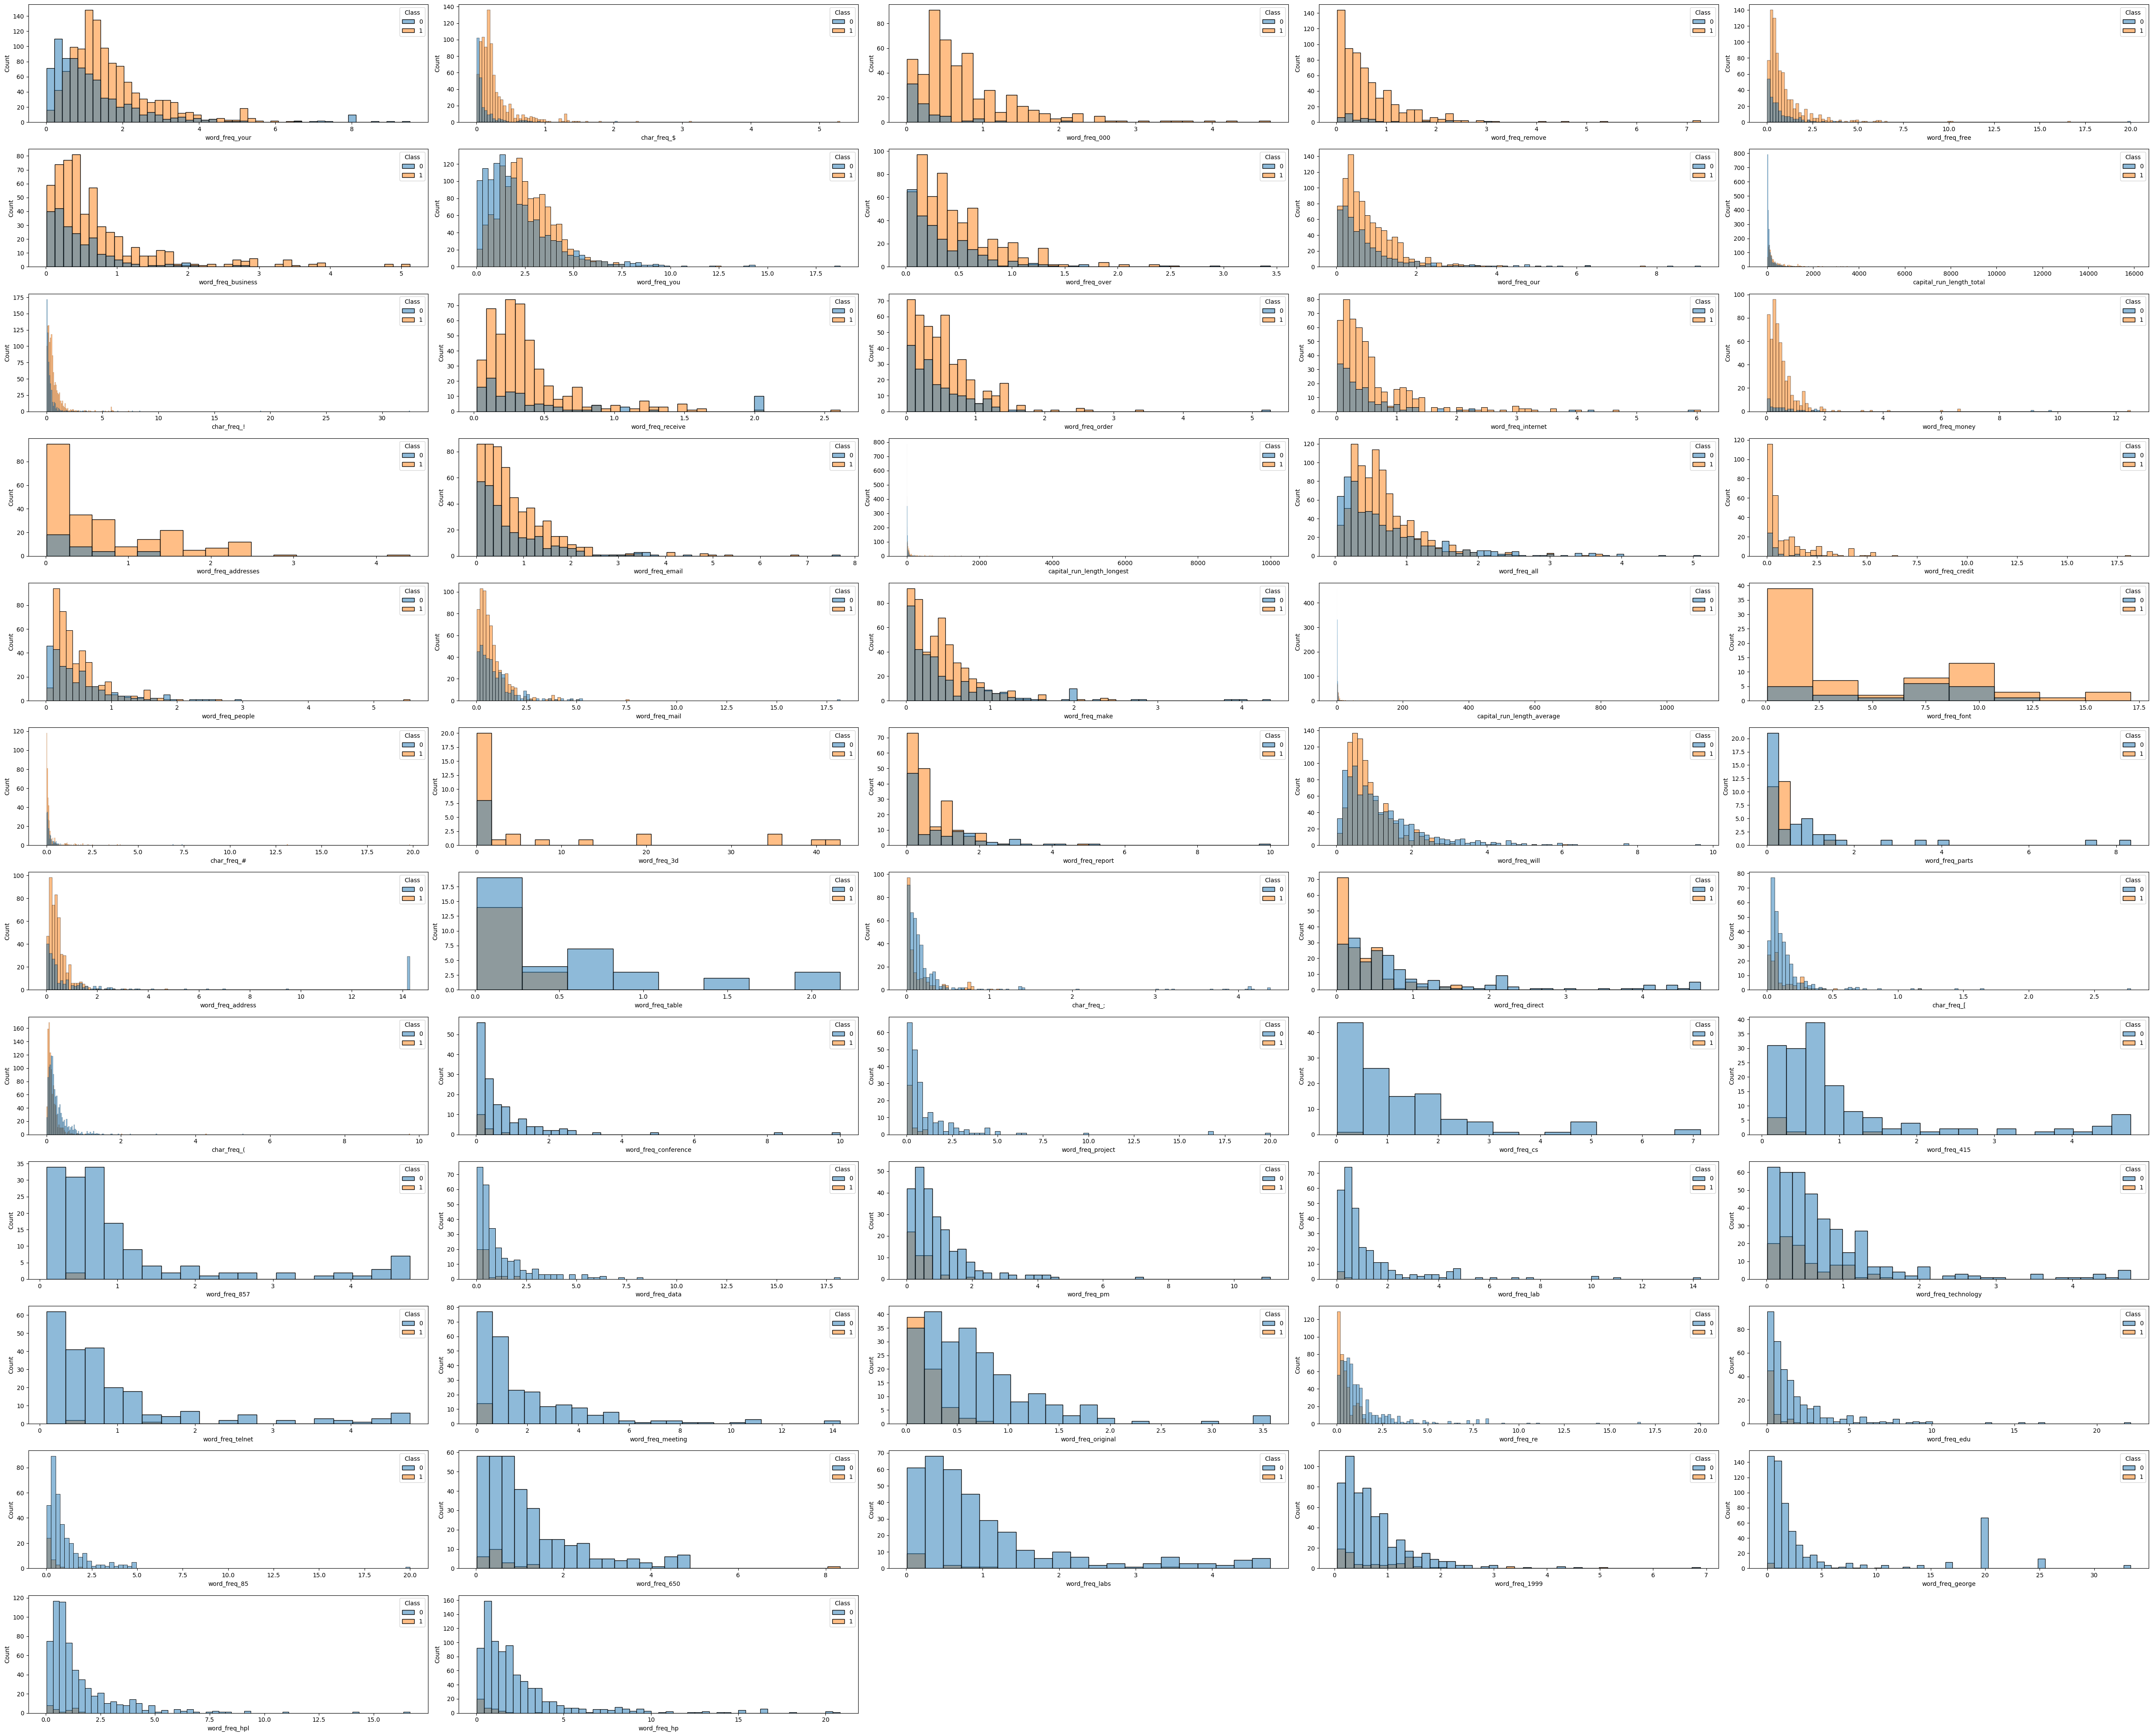

In [8]:
# Non-0 value plots
fig=plt.figure(figsize=(50,50))
for i, col in enumerate(X_cols_sorted):
    X_nonzero = X[X[col] != 0]
    y_nonzero = y[X[col] != 0]['Class']
    
    ax=fig.add_subplot(15,5,i+1)
    g = sns.histplot(
        X_nonzero, x=col, hue=y_nonzero, ax=ax,
    )
fig.tight_layout()
plt.show()

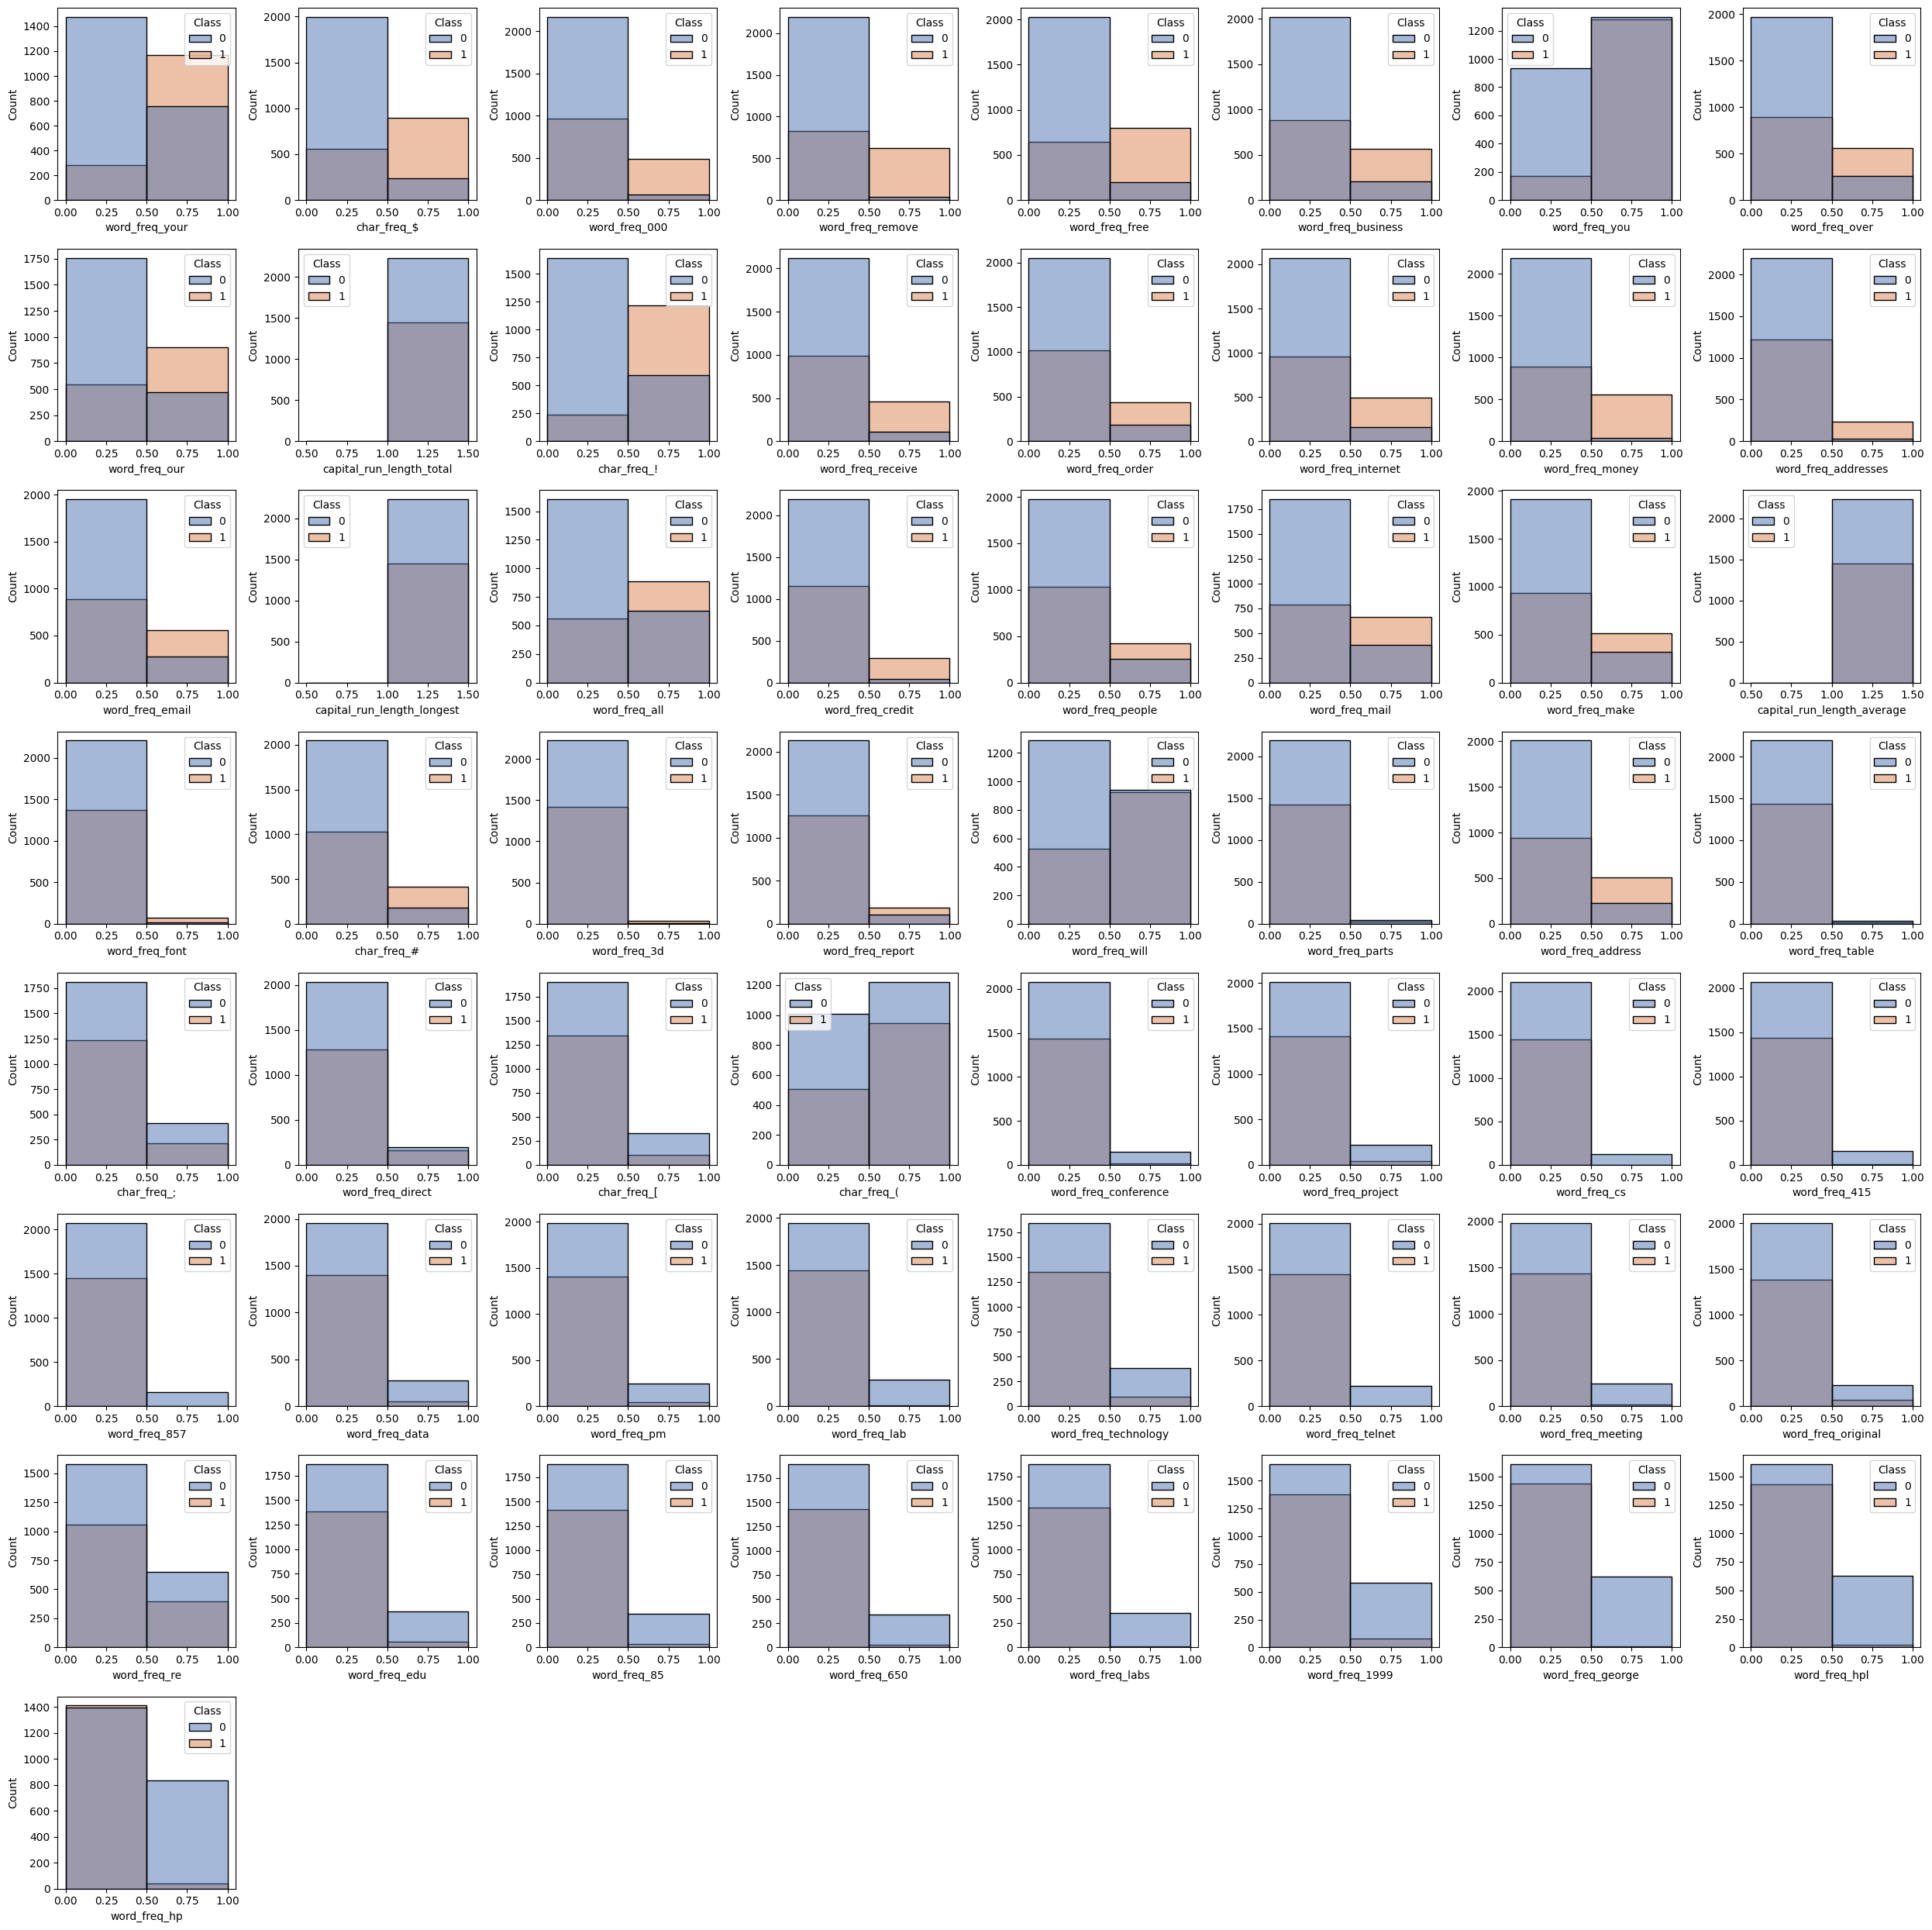

In [9]:
# Binary blot
fig=plt.figure(figsize=(25,25))
for i, col in enumerate(X_cols_sorted):
    X_binary = pd.DataFrame()
    X_binary[col] = (X[col] != 0).astype(int)
    y_binary = y['Class']
    
    ax=fig.add_subplot(8,8,i+1)
    g = sns.histplot(
        X_binary, x=col, hue=y_binary, ax=ax,
        bins=2, palette='deep'
    )
fig.tight_layout()
plt.show()

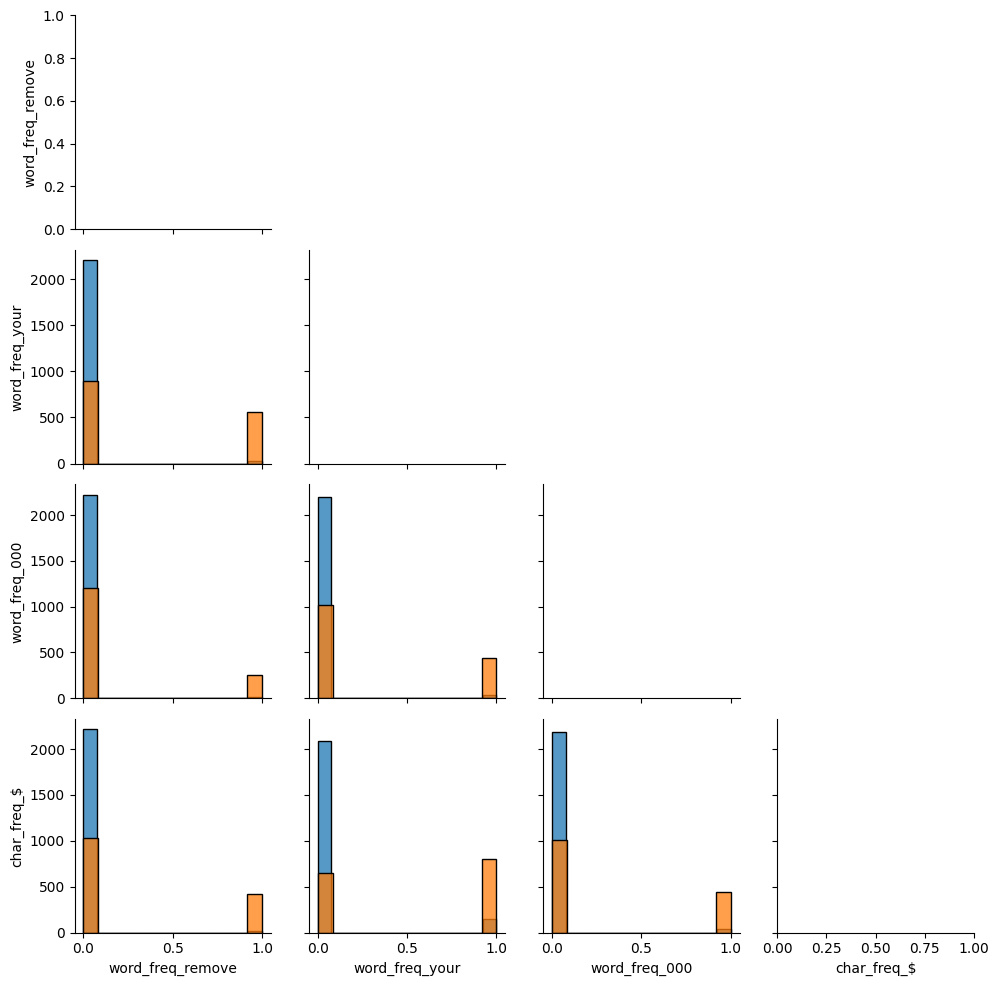

In [10]:
# Check polynomial terms
X2 = X.drop(corrs[(corrs<0.3)].index, axis=1)
g = sns.PairGrid(X2.join(y['Class']), hue='Class', diag_sharey=False, corner=True)
g.map_lower(lambda x1,x2,*args,**kwargs: sns.histplot((x1*x2 > 0).astype(int), *args, **kwargs))

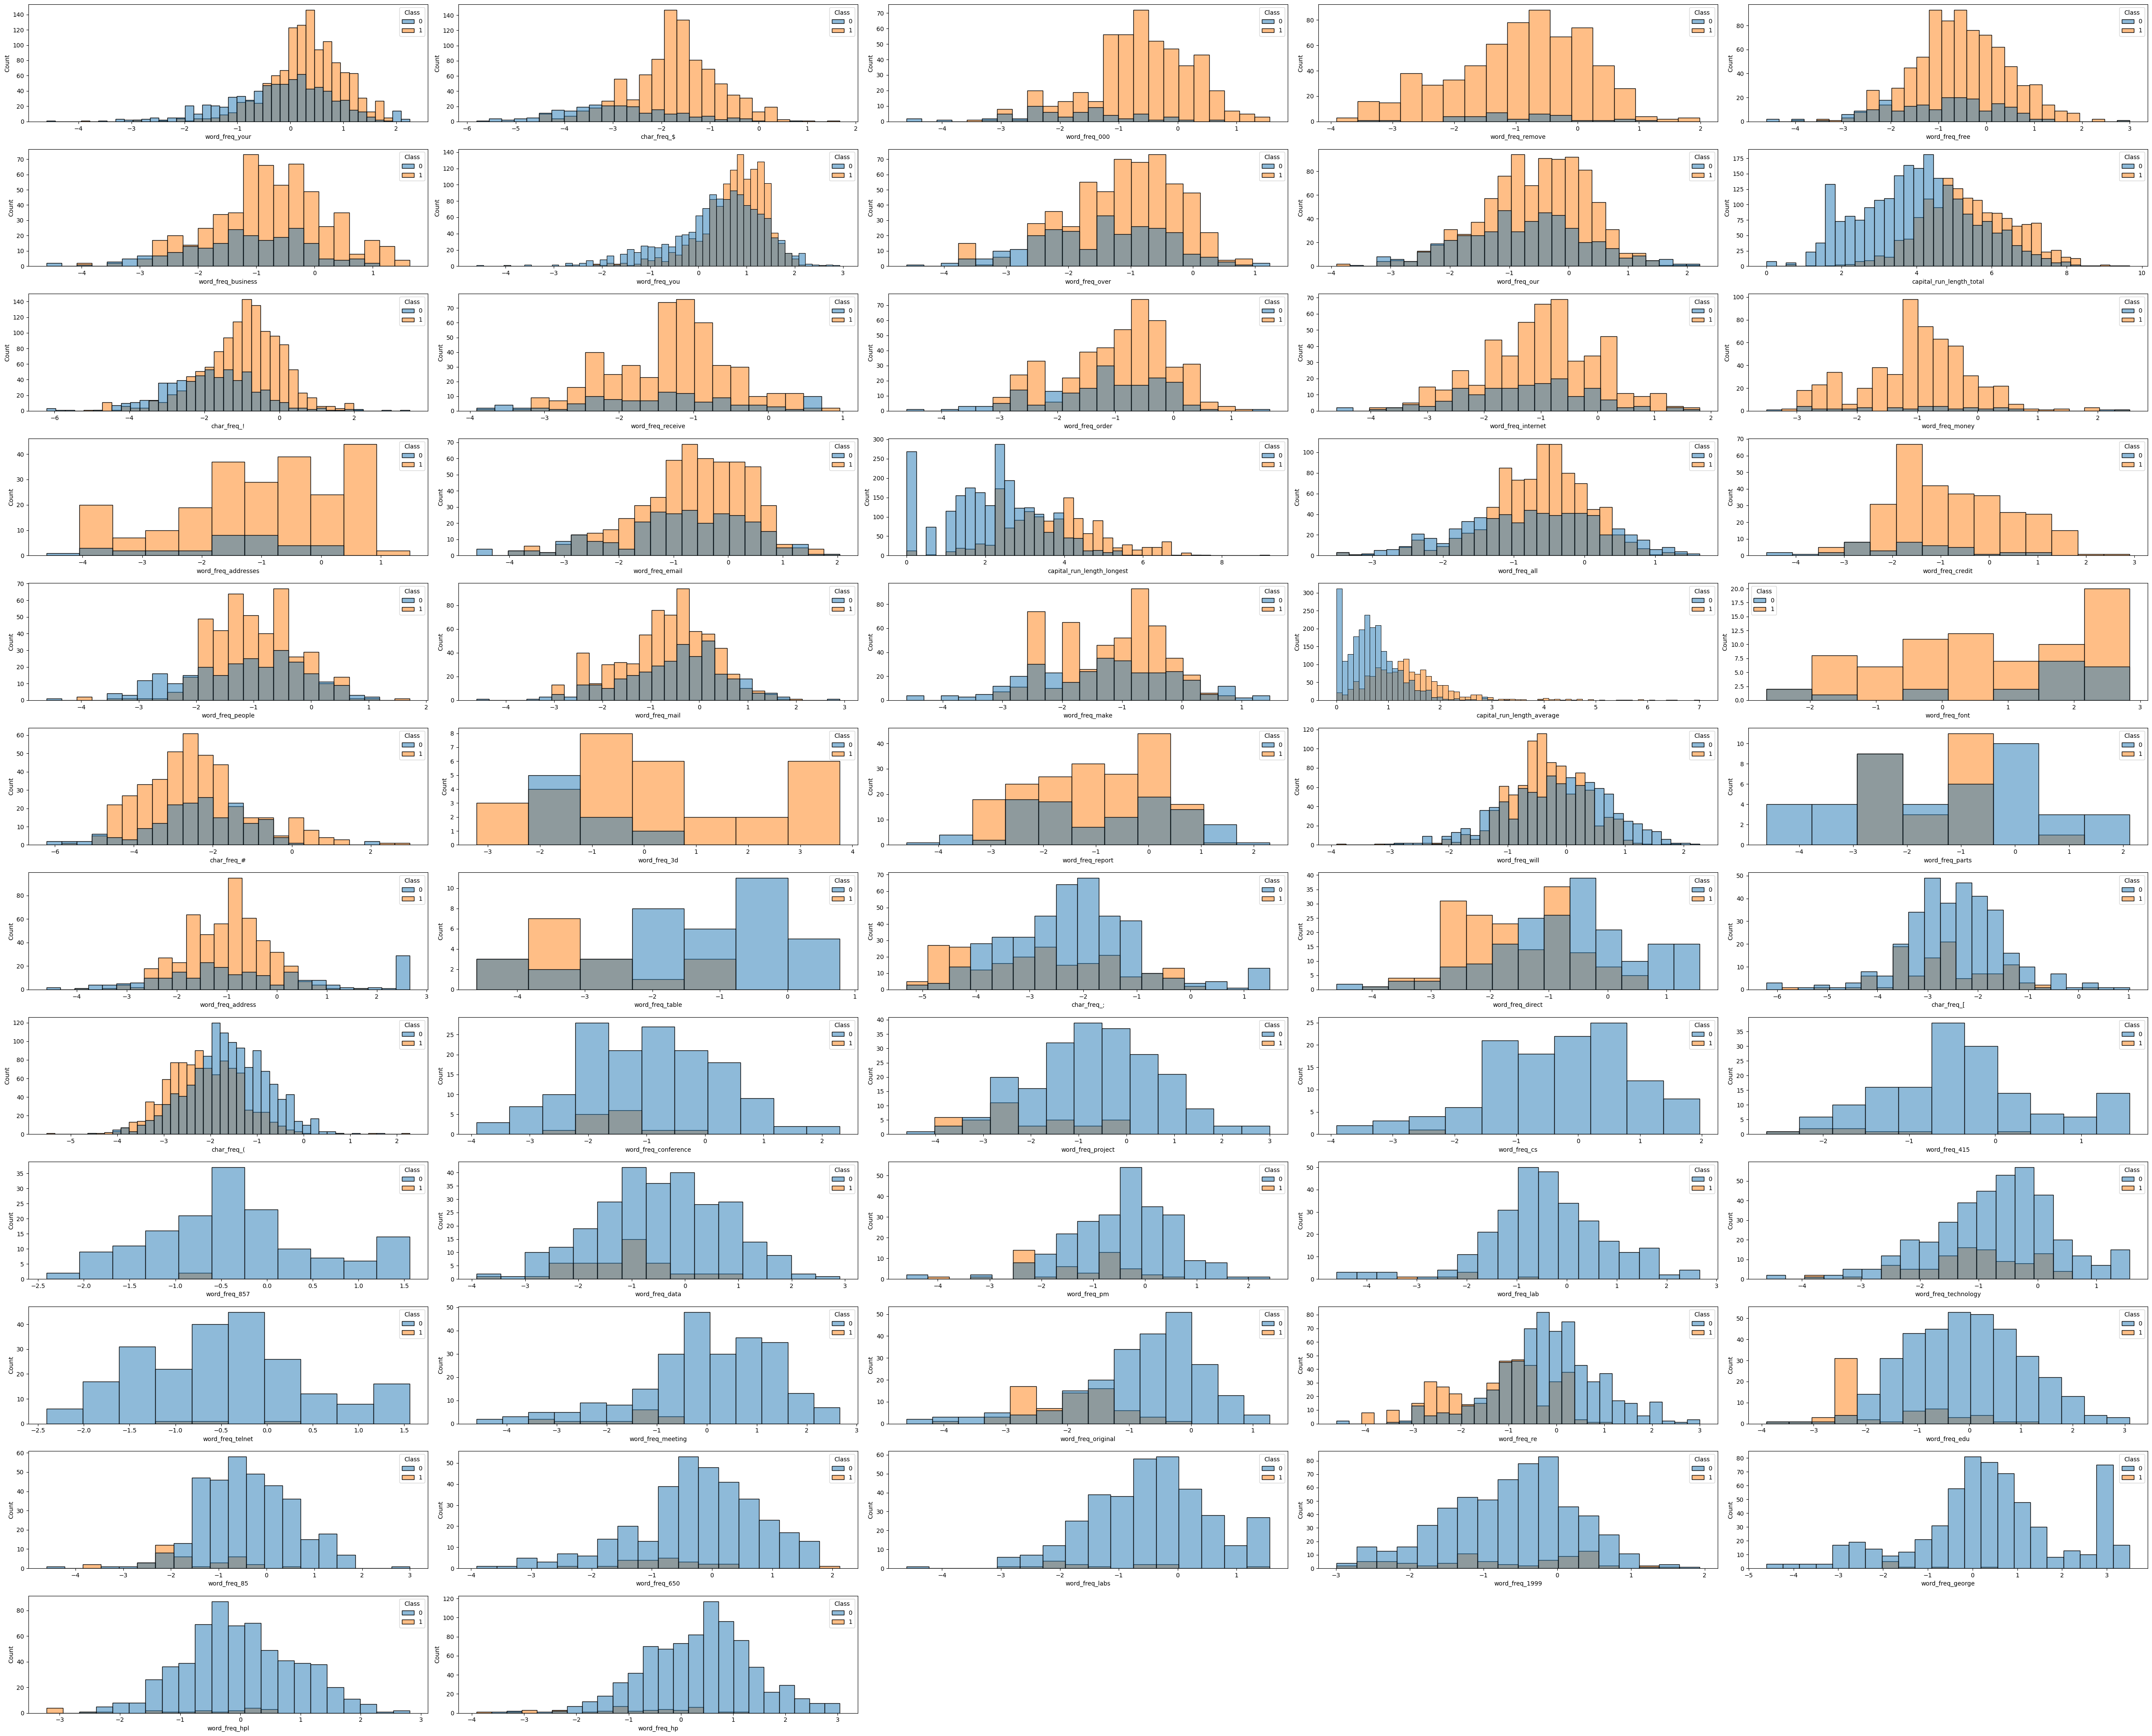

In [12]:
# Logplot
fig=plt.figure(figsize=(50,50))
for i, col in enumerate(X_cols_sorted):
    X_nonzero = X[X[col] != 0]
    y_nonzero = y[X[col] != 0]['Class']
    
    ax=fig.add_subplot(15,5,i+1)
    g = sns.histplot(
        x=np.log(X_nonzero[col]), hue=y_nonzero, ax=ax,
    )
fig.tight_layout()
plt.show()

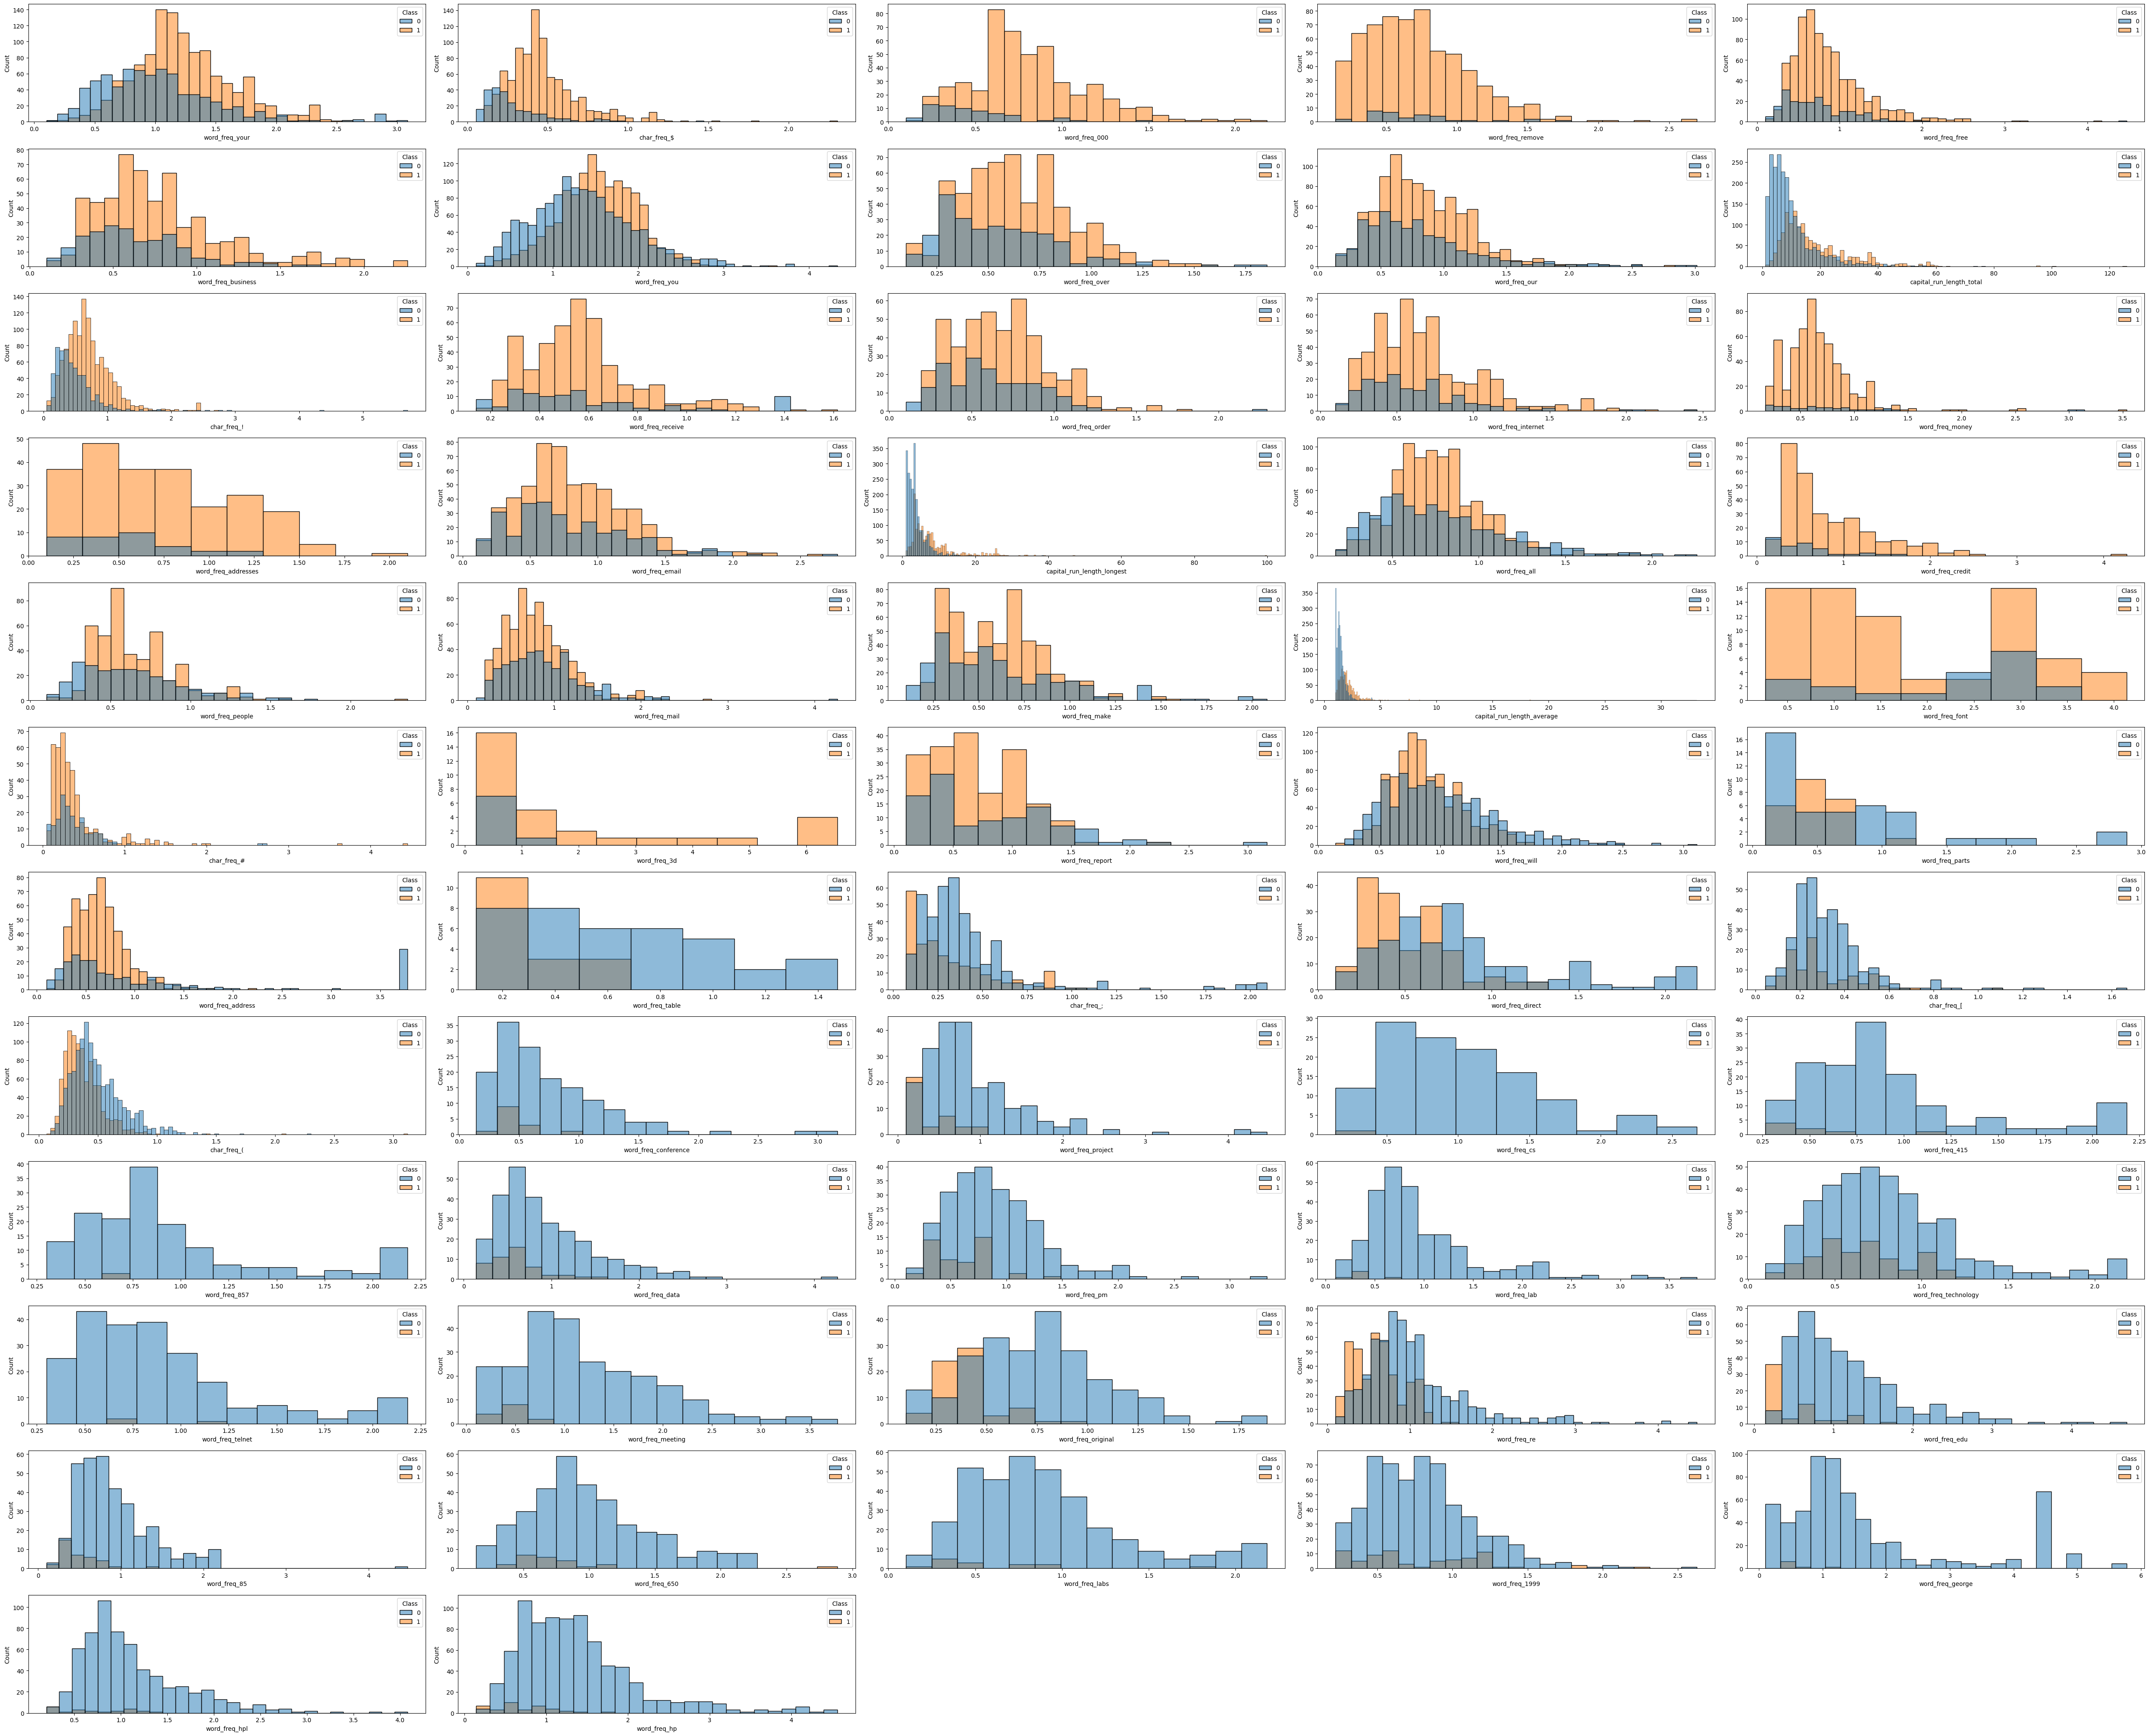

In [13]:
# Sqrt plots
fig=plt.figure(figsize=(50,50))
for i, col in enumerate(X_cols_sorted):
    X_nonzero = X[X[col] != 0]
    y_nonzero = y[X[col] != 0]['Class']
    
    ax=fig.add_subplot(15,5,i+1)
    g = sns.histplot(
        x=np.sqrt(X_nonzero[col]), hue=y_nonzero, ax=ax,
    )
fig.tight_layout()
plt.show()

In [15]:
capital_cols = X.filter(like='capital')
pd.DataFrame({
    'regular': capital_cols.corrwith(y['Class']),
    'log': np.log(capital_cols).corrwith(y['Class']),
    'sqrt': np.sqrt(capital_cols).corrwith(y['Class'])
})

regular       log      sqrt
capital_run_length_average  0.111235  0.463512  0.292806
capital_run_length_longest  0.200734  0.511049  0.432173
capital_run_length_total    0.243328  0.437964  0.370137

In [19]:
freq_cols = X.filter(like='freq')
res = pd.DataFrame({
    'regular': freq_cols.corrwith(y['Class']),
    'sqrt': np.sqrt(freq_cols).corrwith(y['Class']),
    'log': np.log(freq_cols + 0.001).corrwith(y['Class']),
})
res['diff_log'] = res['log'].abs() - res['regular'].abs() 
res['diff_sqrt'] = res['sqrt'].abs() - res['regular'].abs() 
display(res.sort_values(by='diff_log', ascending=False))
display(f"log gain: {res['diff_log'].sum()}")
display(f"sqrt gain: {res['diff_sqrt'].sum()}")

regular      sqrt       log  diff_log  diff_sqrt
char_freq_!           0.233548  0.526144  0.599062  0.365514   0.292595
word_freq_money       0.216022  0.410314  0.475610  0.259588   0.194292
word_freq_address    -0.030950  0.125845  0.282871  0.251921   0.094895
word_freq_free        0.287508  0.456796  0.513204  0.225696   0.169287
char_freq_$           0.369653  0.536923  0.575389  0.205736   0.167270
word_freq_remove      0.334098  0.460750  0.518999  0.184902   0.126652
char_freq_#           0.071476  0.187777  0.255757  0.184281   0.116301
word_freq_our         0.245267  0.370219  0.418396  0.173129   0.124953
word_freq_will        0.022363  0.122340  0.192036  0.169673   0.099977
word_freq_george     -0.184252 -0.269225 -0.346594  0.162342   0.084973
word_freq_mail        0.135624  0.240322  0.296419  0.160795   0.104698
word_freq_hp         -0.250703 -0.358158 -0.402149  0.151446   0.107456
word_freq_all         0.193627  0.293267  0.332917  0.139290   0.099640
word_freq_credit      0.181218  0.276591  0.317691  0.136472   0.095373
word_freq_receive     0.228381  0.323302  0.360378  0.131997   0.094921
word_freq_internet    0.221751  0.312138  0.344467  0.122716   0.090387
word_freq_make        0.128704  0.212602  0.247651  0.118947   0.083898
word_freq_hpl        -0.224858 -0.307710 -0.340722  0.115863   0.082852
word_freq_your        0.384361  0.481907  0.488163  0.103802   0.097545
word_freq_email       0.201977  0.274349  0.305317  0.103341   0.072372
word_freq_report      0.053543  0.111764  0.147703  0.094160   0.058220
word_freq_lab        -0.129807 -0.194464 -0.222416  0.092609   0.064657
word_freq_000         0.338000  0.410976  0.429416  0.091416   0.072976
word_freq_business    0.275337  0.345850  0.363435  0.088099   0.070513
word_freq_1999       -0.180894 -0.240081 -0.264973  0.084079   0.059188
word_freq_you         0.271417  0.347941  0.351862  0.080445   0.076524
word_freq_people      0.147275  0.203885  0.223606  0.076331   0.056610
word_freq_85         -0.143131 -0.207089 -0.217896  0.074765   0.063958
word_freq_labs       -0.170095 -0.220777 -0.242715  0.072620   0.050682
word_freq_over        0.257038  0.314214  0.326915  0.069878   0.057177
word_freq_addresses   0.205933  0.248663  0.271540  0.065607   0.042729
word_freq_telnet     -0.133579 -0.177708 -0.197188  0.063609   0.044129
word_freq_project    -0.087210 -0.140638 -0.150736  0.063527   0.053428
word_freq_order       0.224995  0.274106  0.288130  0.063134   0.049111
word_freq_edu        -0.142765 -0.197424 -0.203666  0.060901   0.054658
word_freq_meeting    -0.134542 -0.177141 -0.194797  0.060255   0.042599
word_freq_650        -0.164110 -0.206617 -0.222454  0.058344   0.042507
word_freq_conference -0.081166 -0.123116 -0.136032  0.054866   0.041950
word_freq_857        -0.111910 -0.148408 -0.164010  0.052100   0.036498
word_freq_data       -0.115881 -0.156364 -0.162988  0.047107   0.040483
word_freq_415        -0.110268 -0.144108 -0.155641  0.045373   0.033840
word_freq_cs         -0.100815 -0.130315 -0.144790  0.043975   0.029500
char_freq_[          -0.071173 -0.107105 -0.114885  0.043713   0.035932
word_freq_font        0.085352  0.104413  0.127624  0.042271   0.019061
word_freq_3d          0.057000  0.074644  0.089938  0.032938   0.017643
word_freq_pm         -0.121560 -0.150776 -0.148647  0.027087   0.029216
word_freq_technology -0.133244 -0.157081 -0.158331  0.025087   0.023837
char_freq_;          -0.060803 -0.078108 -0.073491  0.012688   0.017305
word_freq_table      -0.048083 -0.047234 -0.035395 -0.012689  -0.000849
word_freq_original   -0.134975 -0.138607 -0.118610 -0.016364   0.003633
word_freq_parts      -0.030767 -0.024428 -0.011235 -0.019532  -0.006339
char_freq_(          -0.078027 -0.046035  0.039610 -0.038417  -0.031991
word_freq_direct     -0.065570 -0.031188  0.017660 -0.047910  -0.034382
word_freq_re         -0.141870 -0.137111 -0.069575 -0.072295  -0.004759

'log gain: 4.947224320726869'

'sqrt gain: 3.6105812783254305'

## Outliers

/tmp/ipykernel_7185/2796869225.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i, figsize=(17,1))


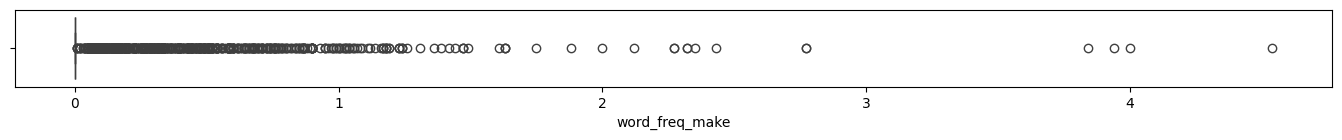

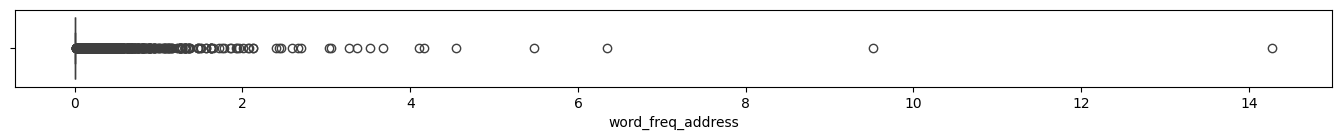

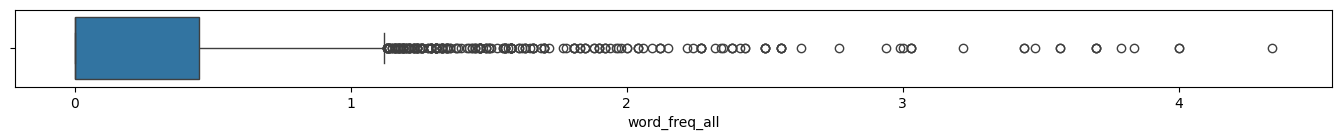

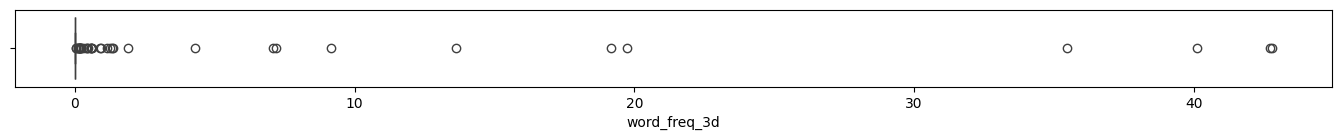

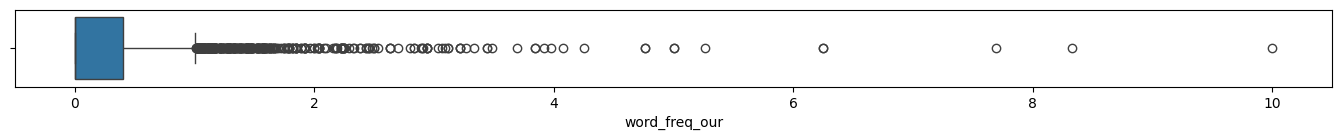

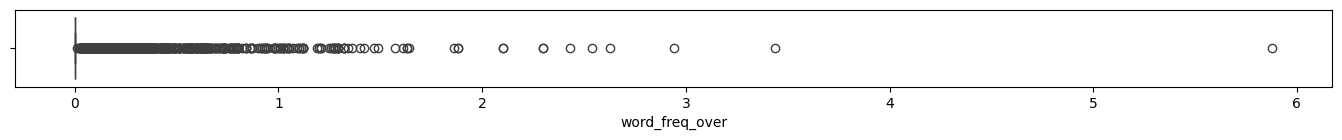

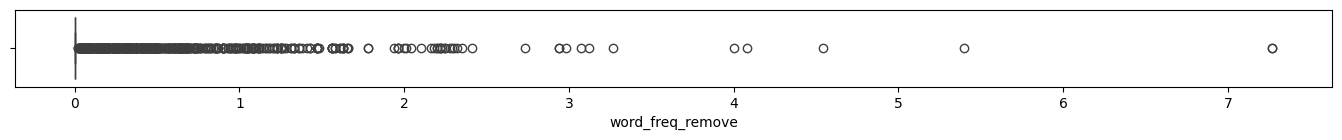

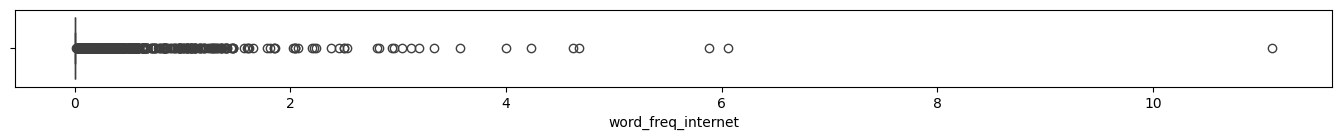

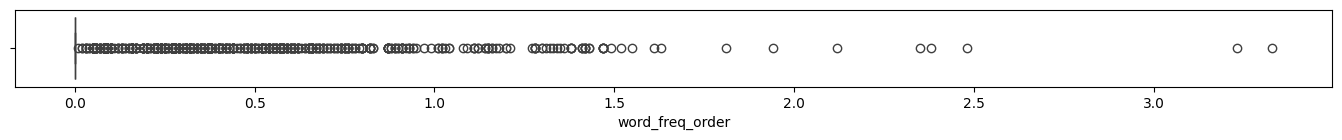

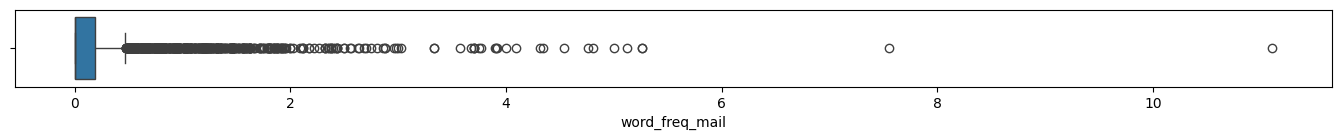

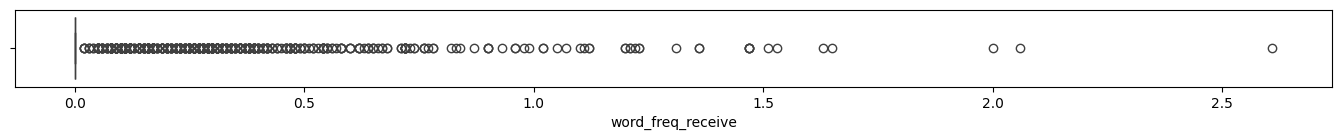

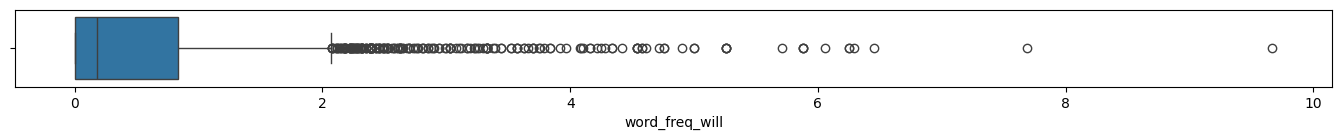

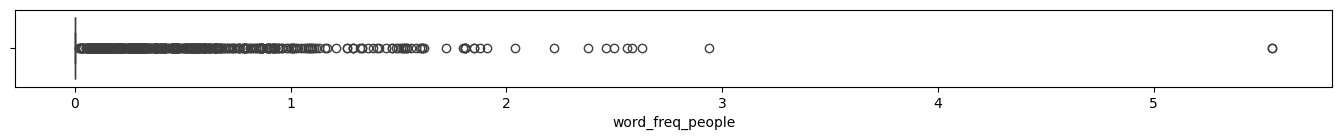

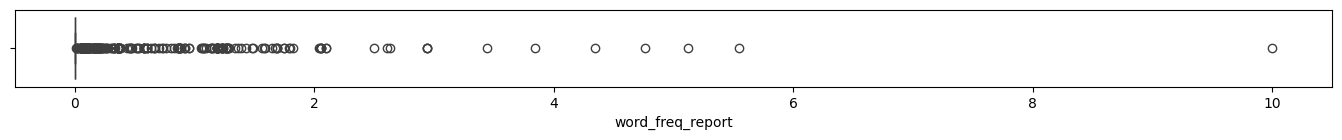

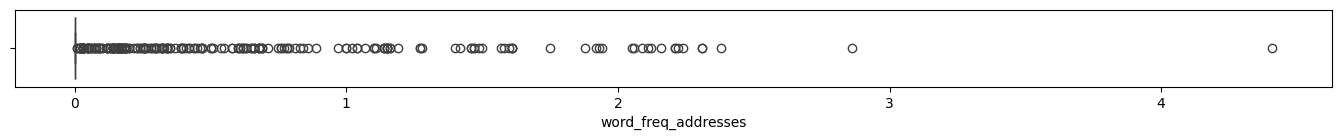

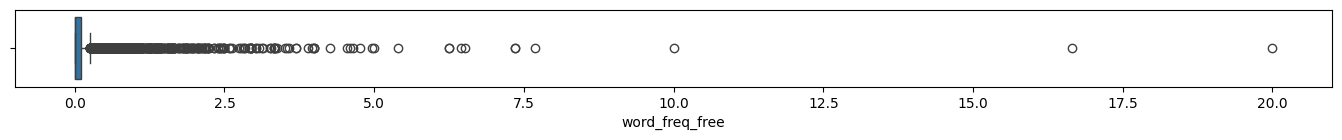

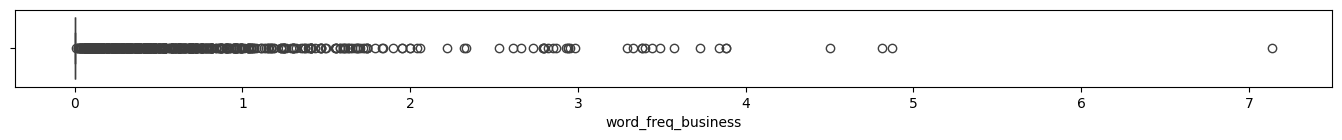

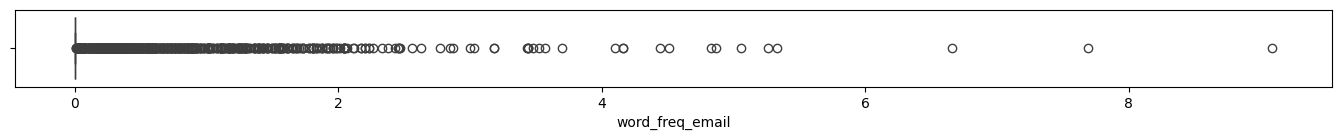

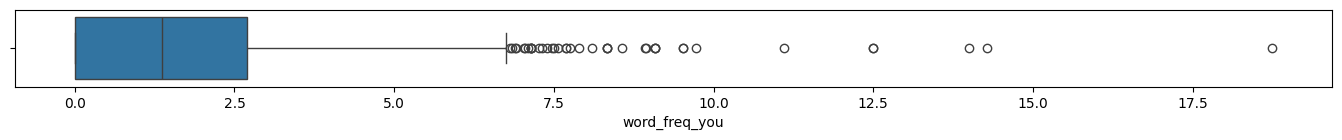

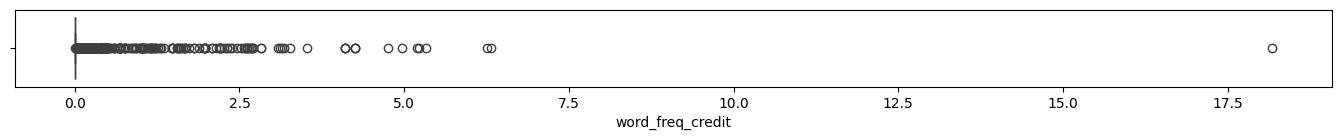

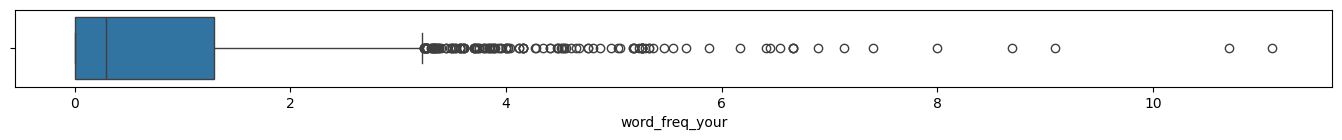

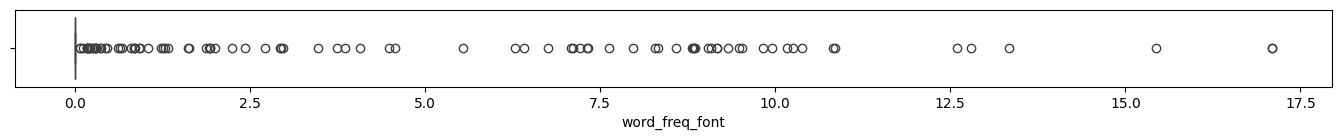

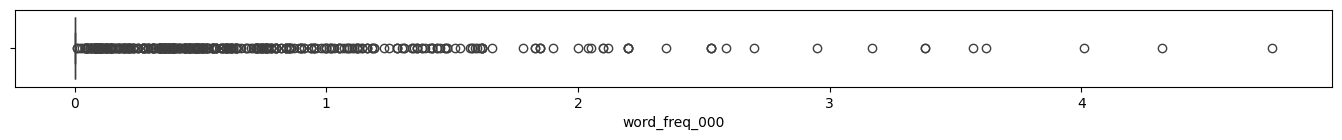

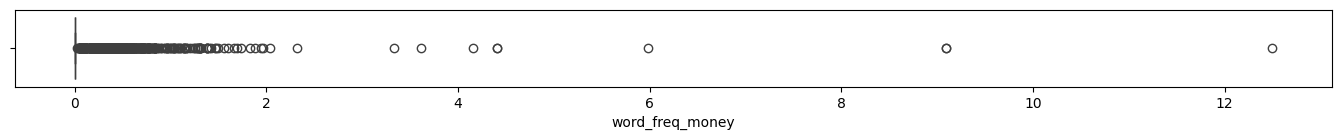

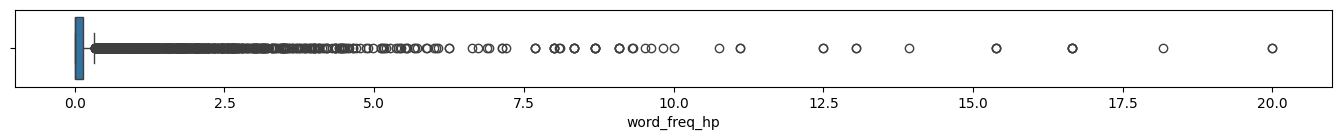

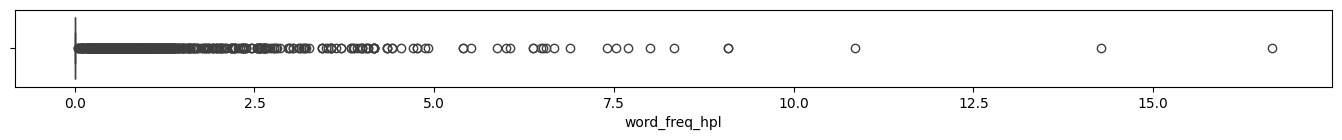

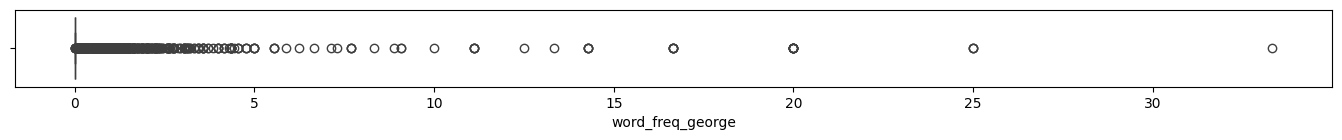

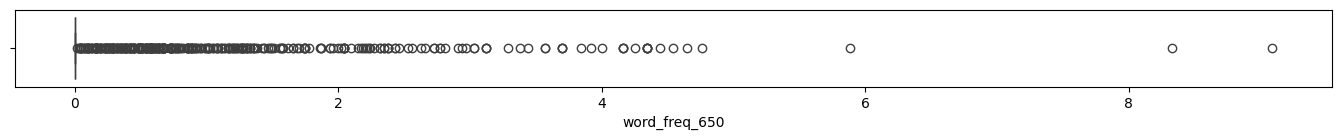

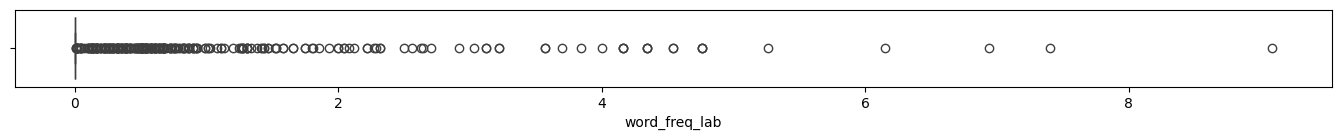

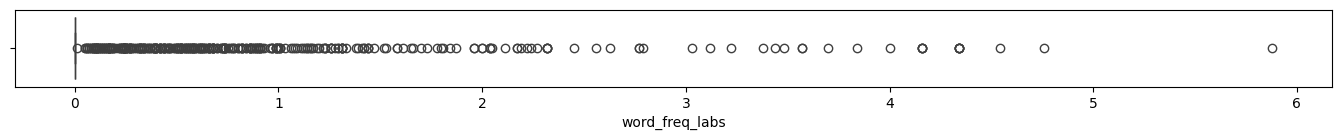

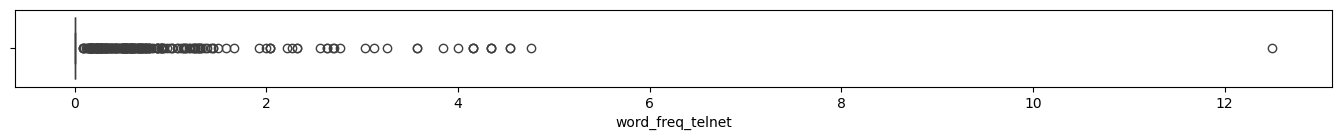

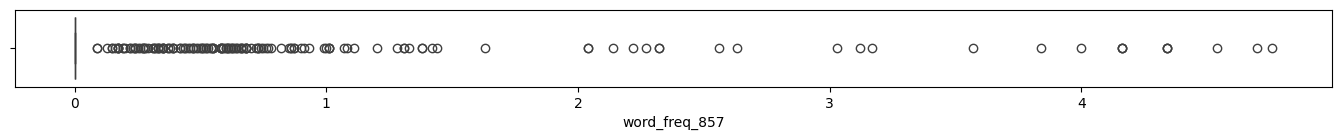

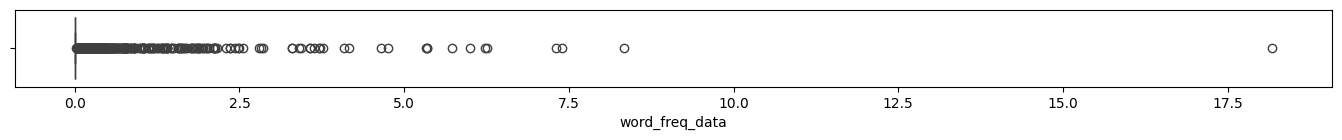

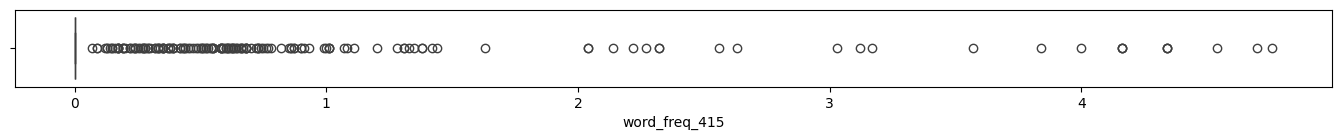

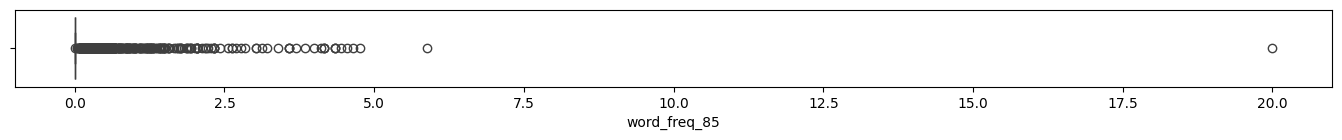

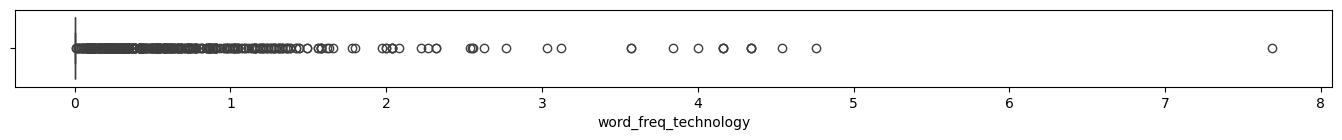

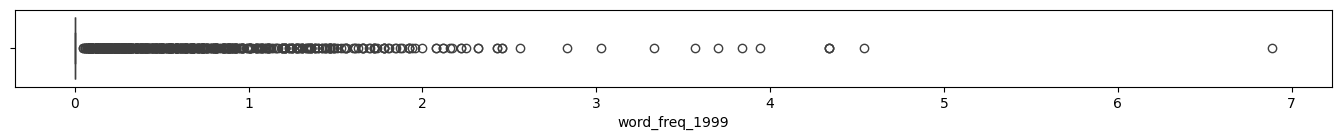

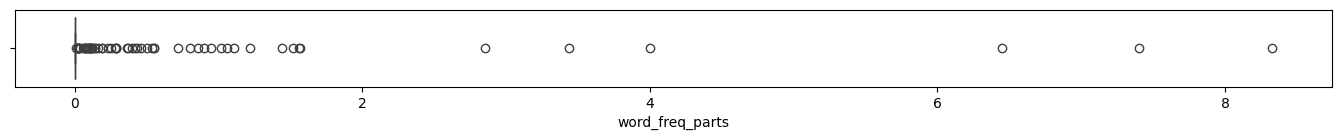

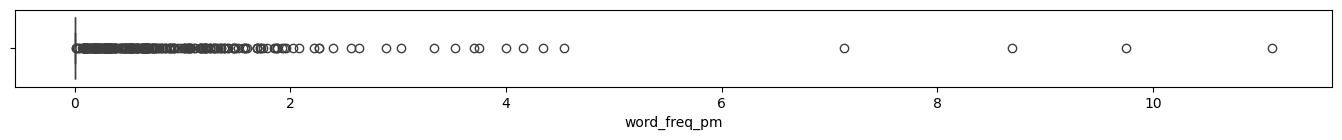

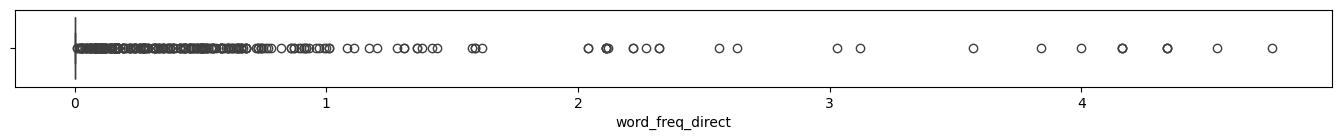

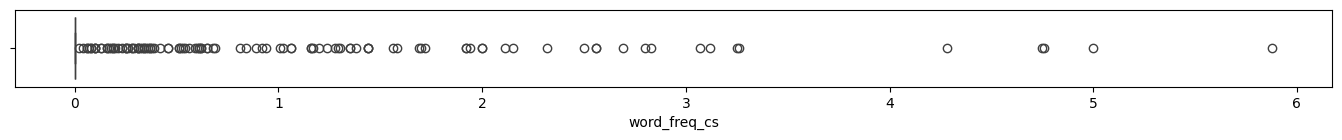

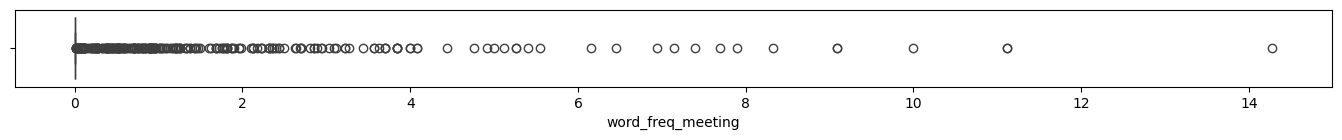

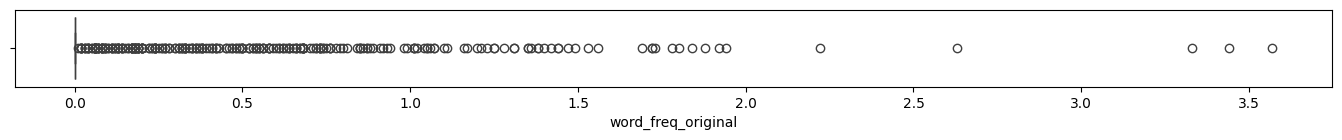

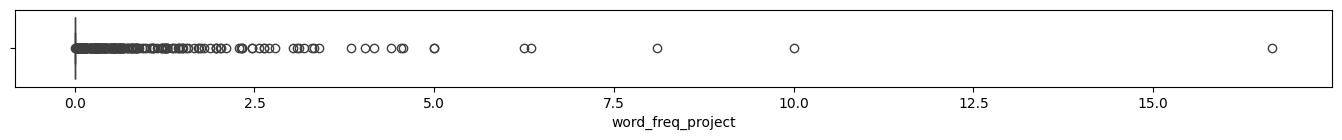

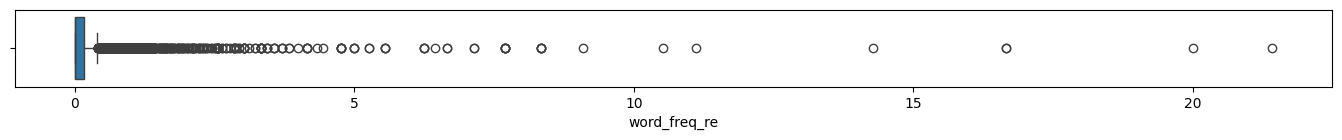

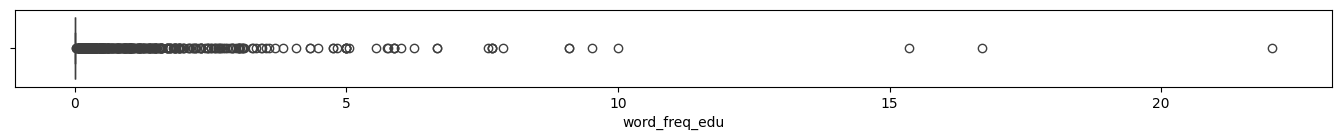

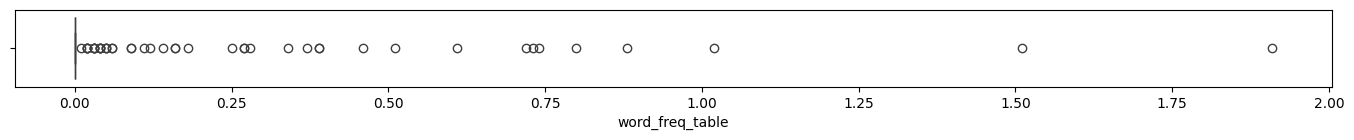

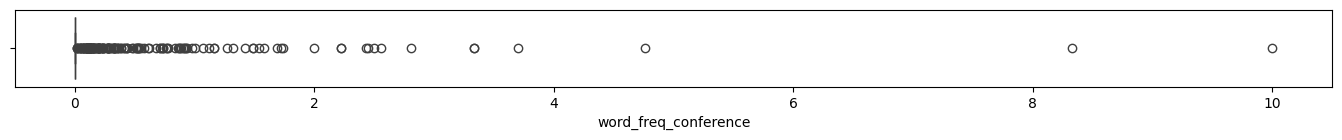

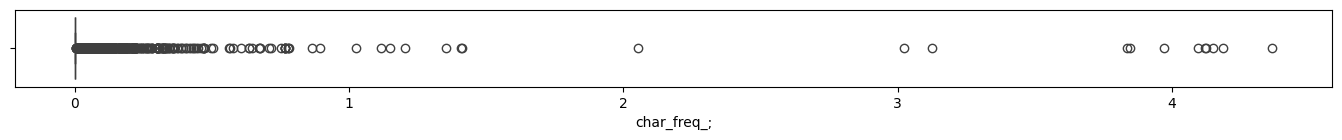

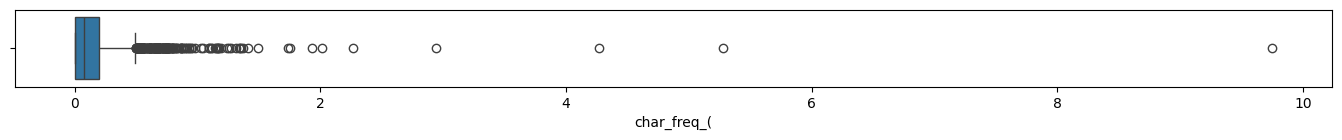

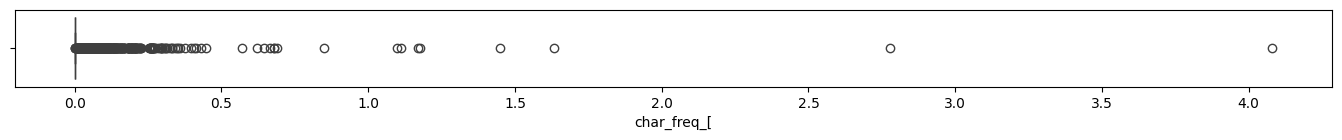

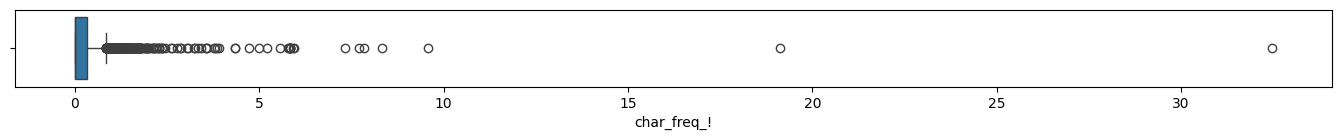

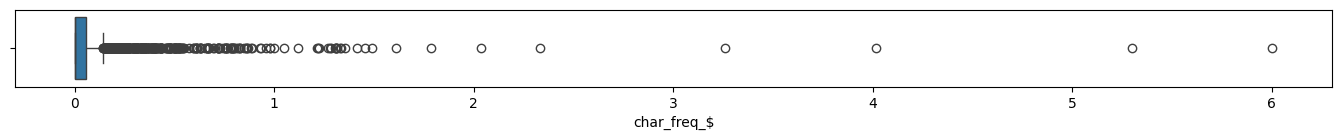

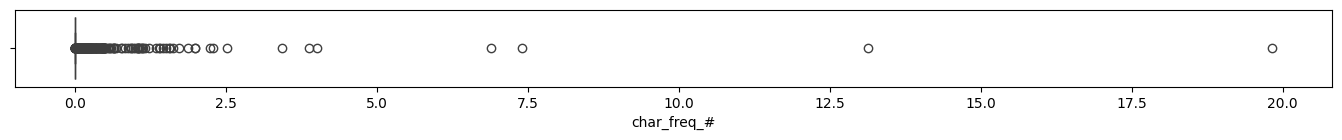

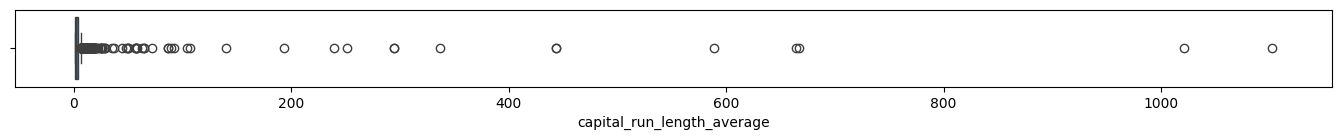

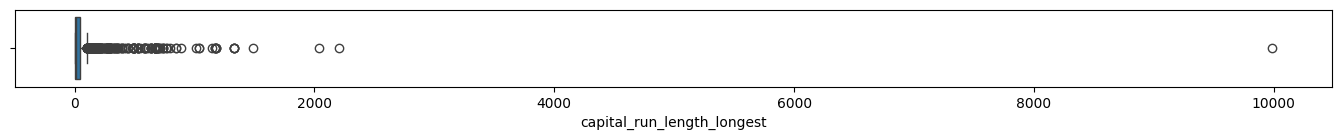

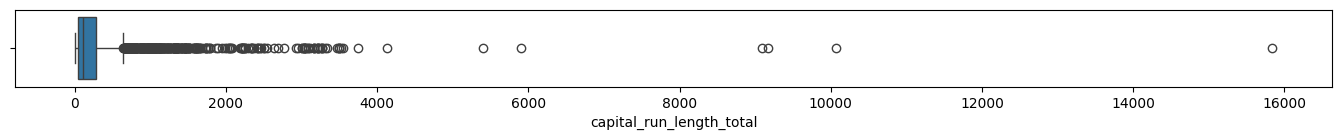

In [55]:
for i, column in enumerate(X):
    plt.figure(i, figsize=(17,1))
    sns.boxplot(data=X, x=column)
plt.show()

/tmp/ipykernel_7185/3081838570.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i, figsize=(17,1))


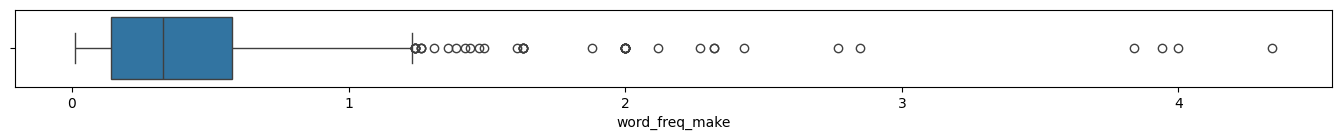

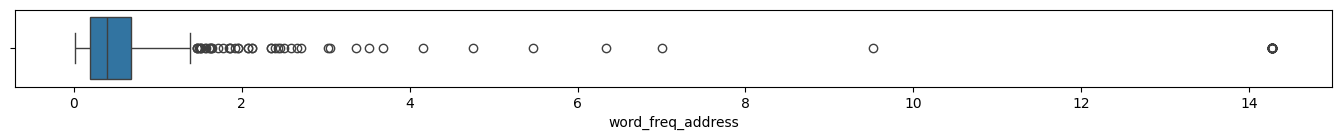

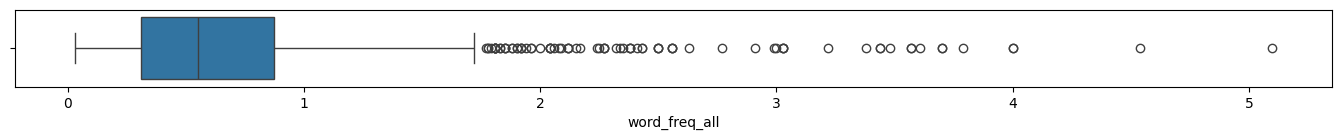

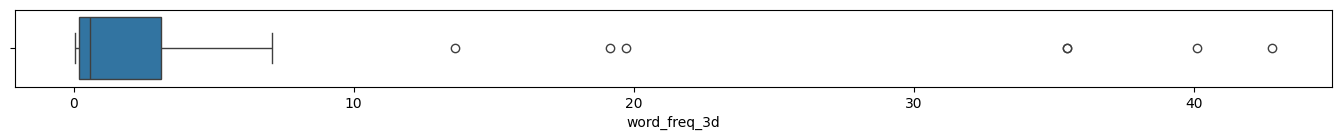

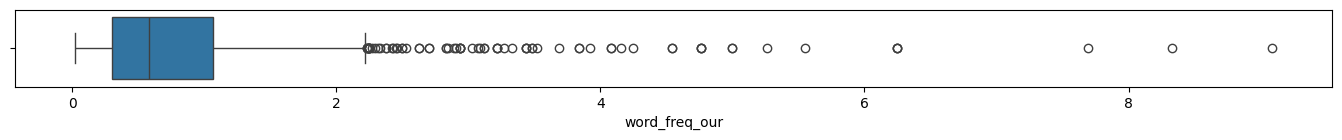

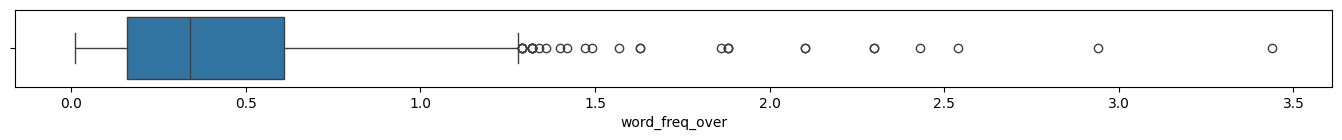

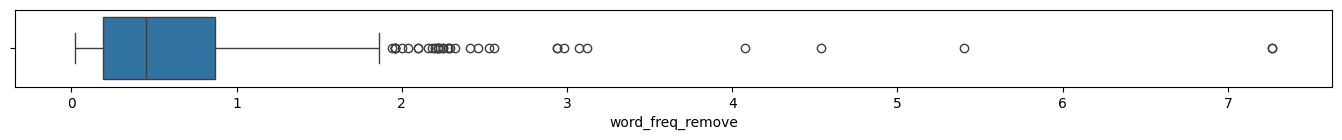

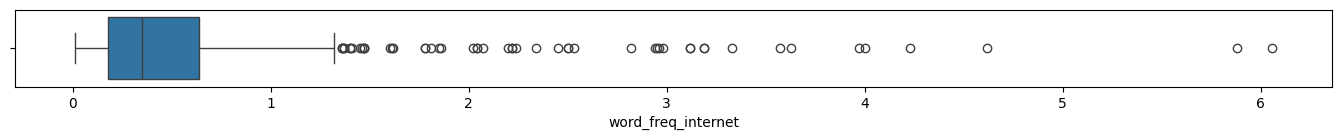

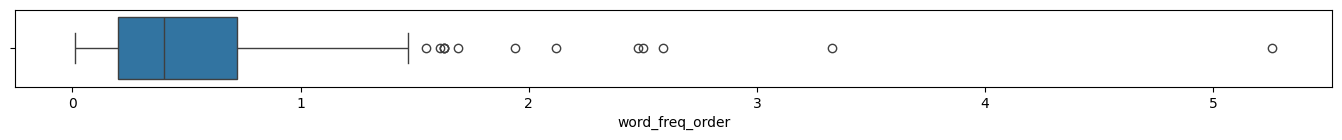

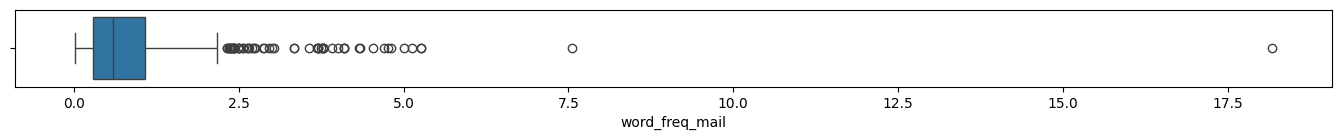

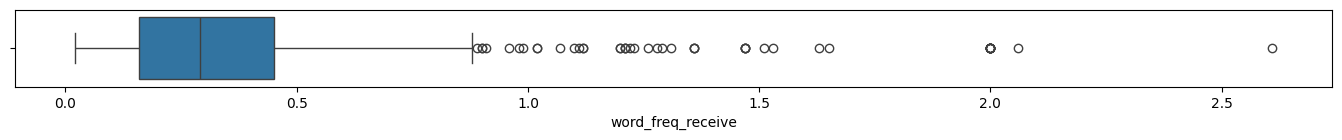

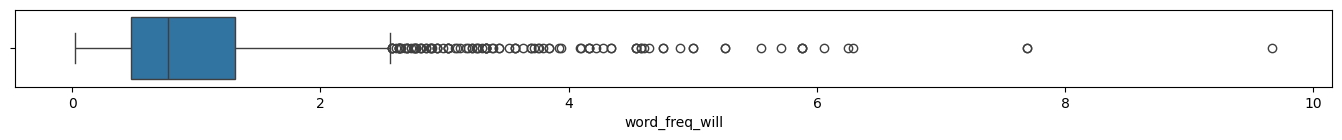

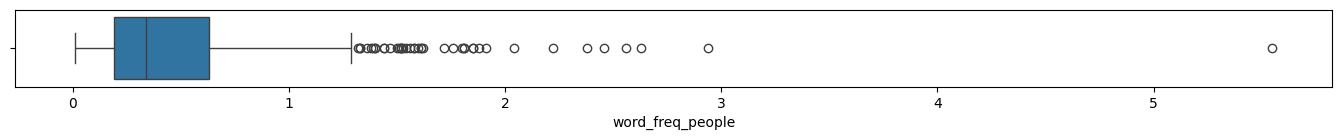

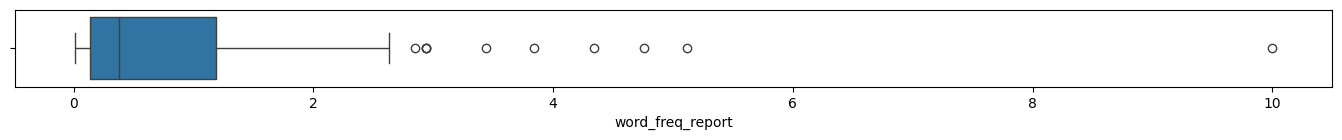

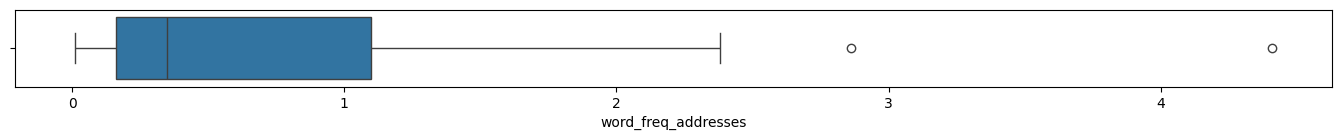

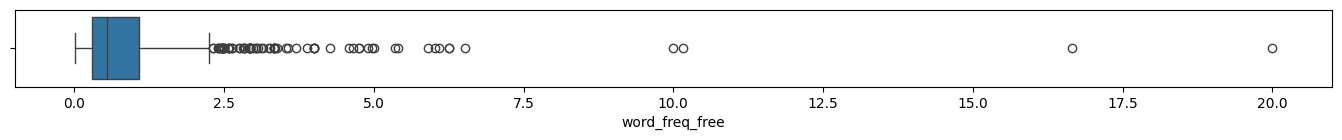

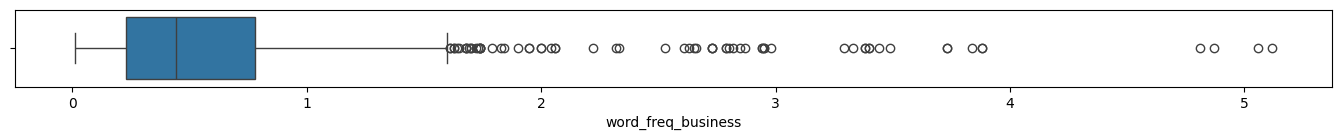

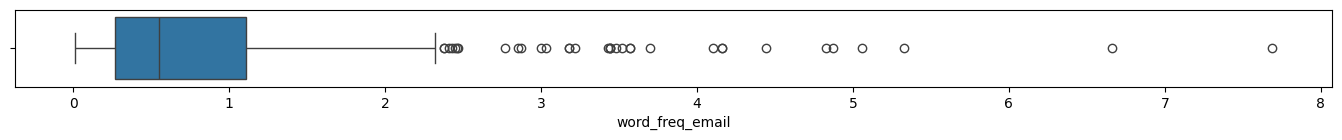

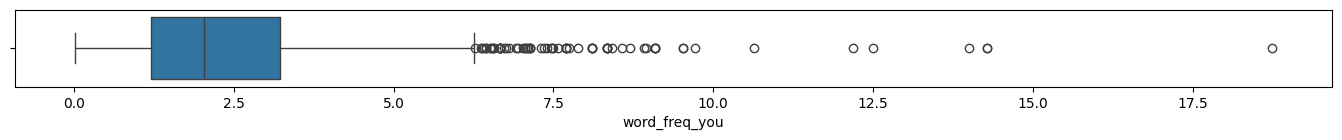

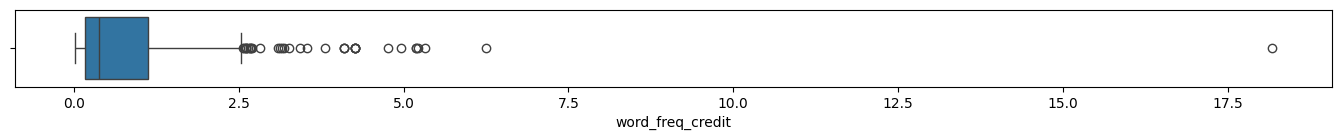

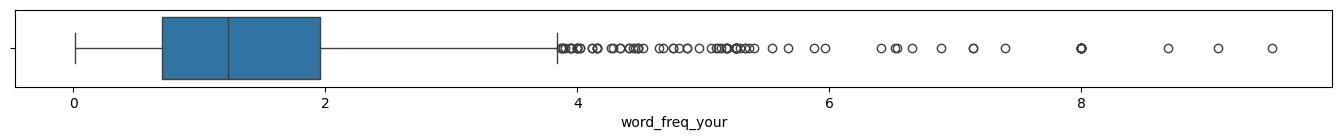

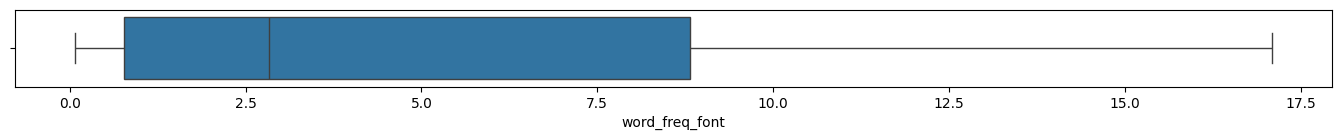

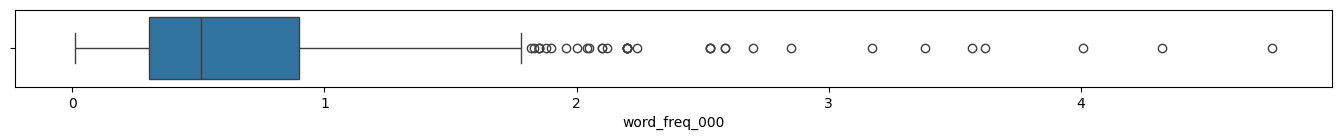

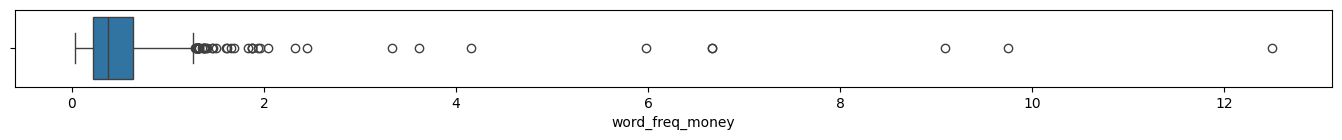

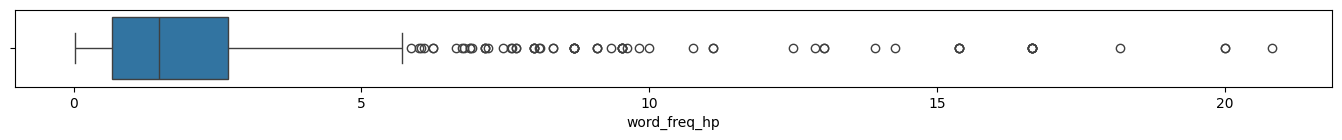

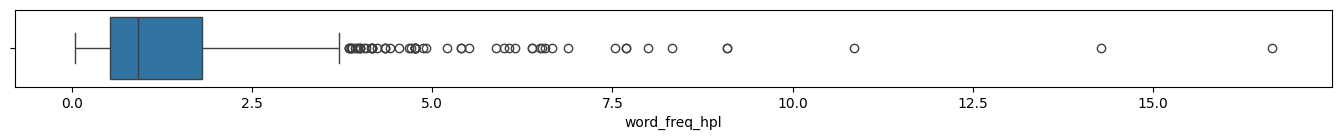

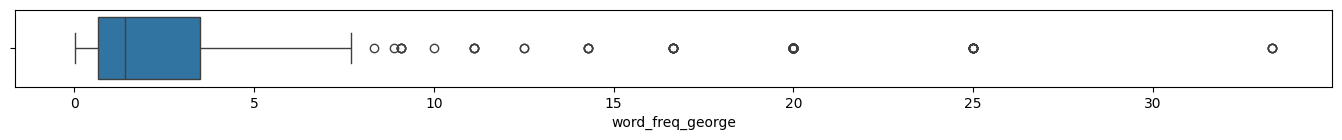

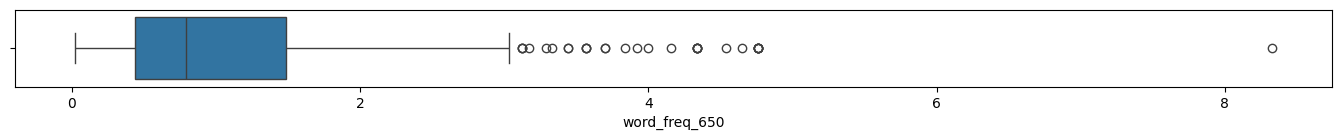

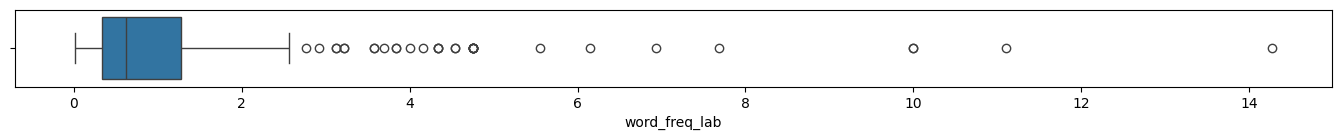

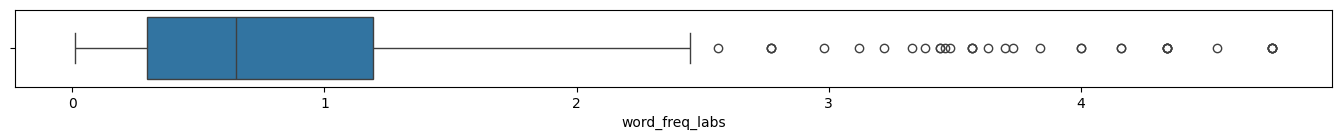

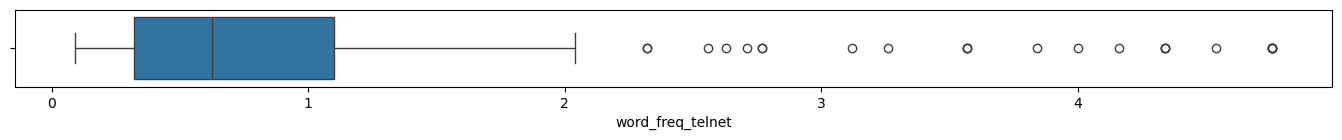

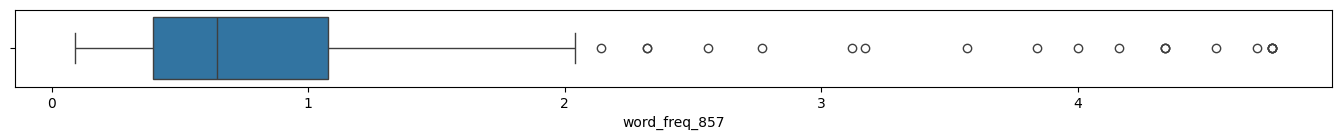

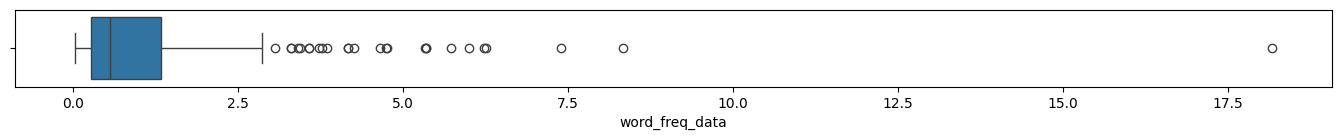

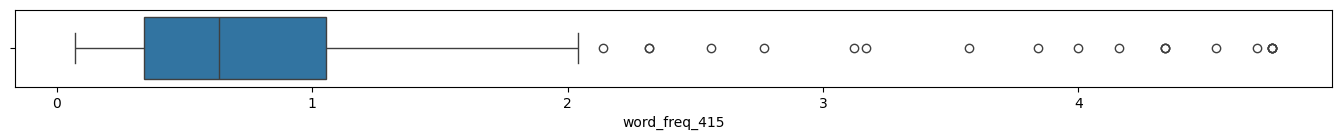

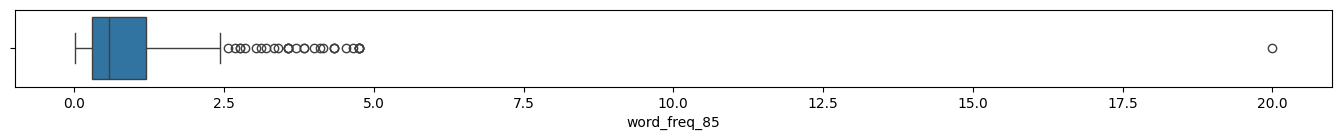

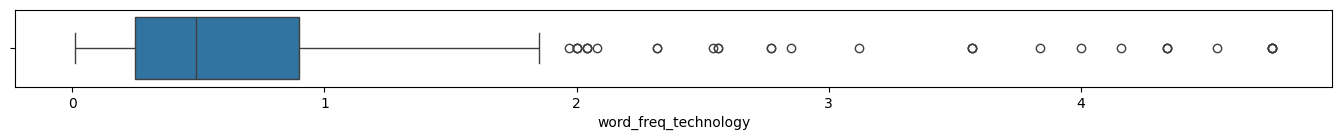

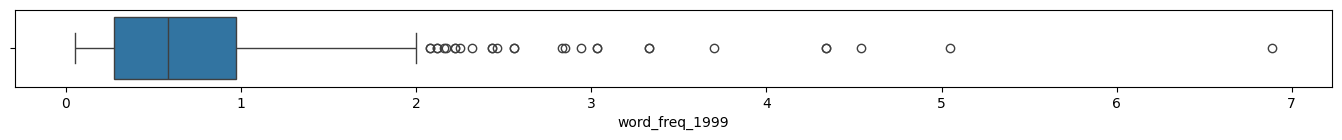

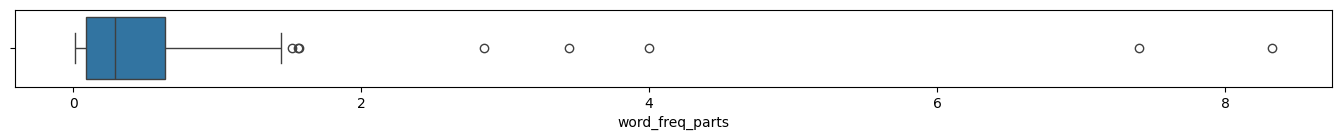

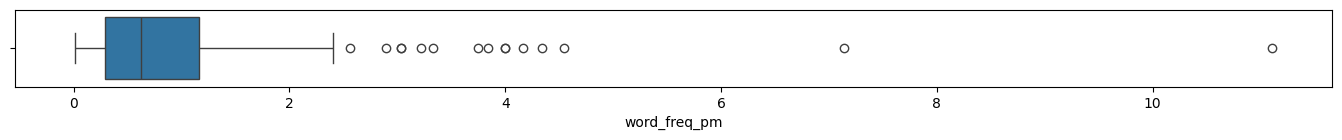

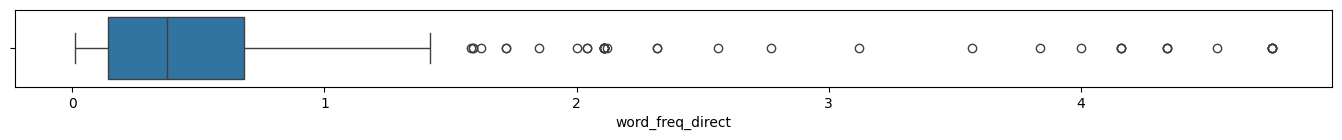

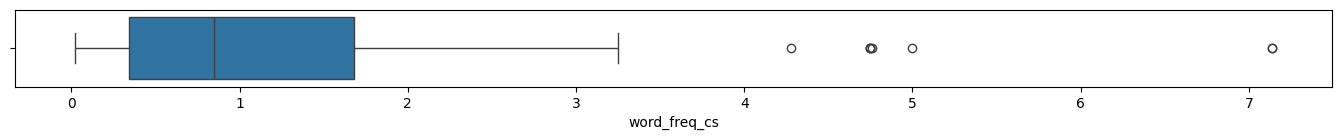

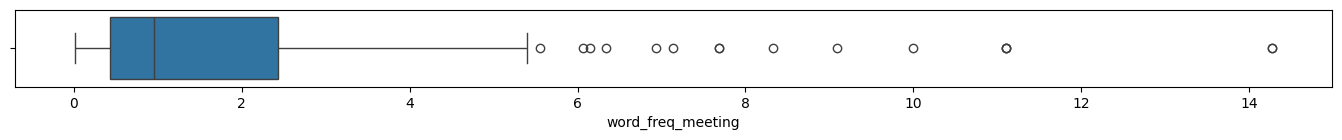

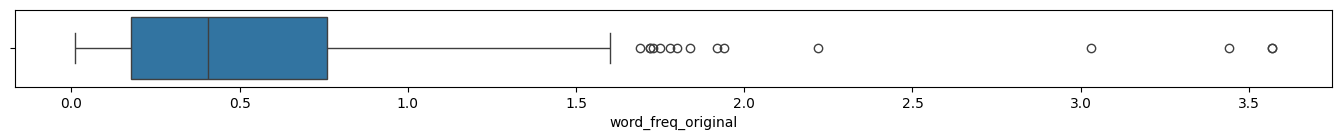

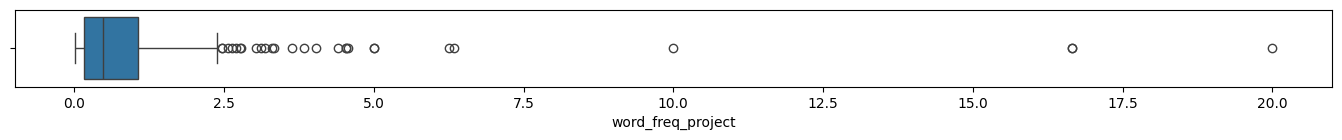

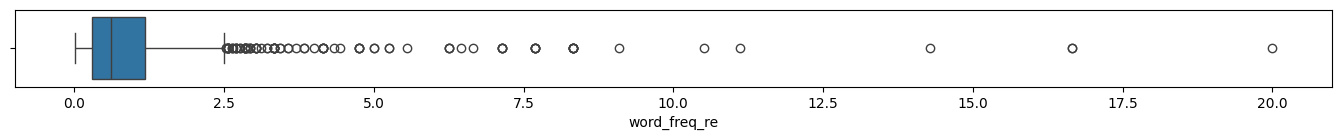

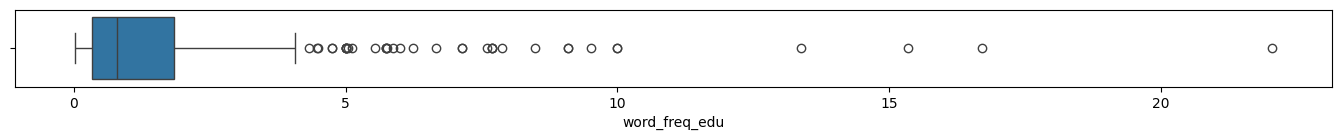

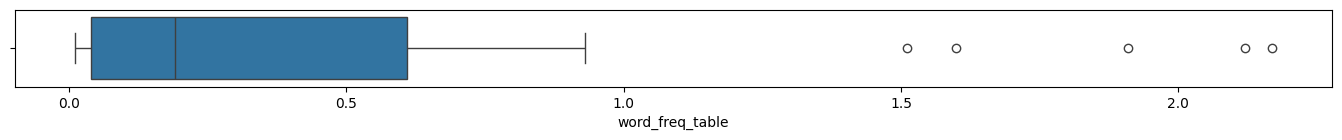

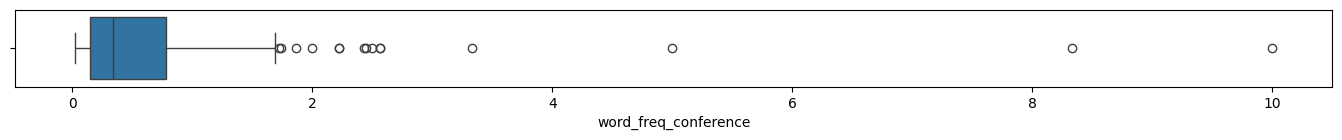

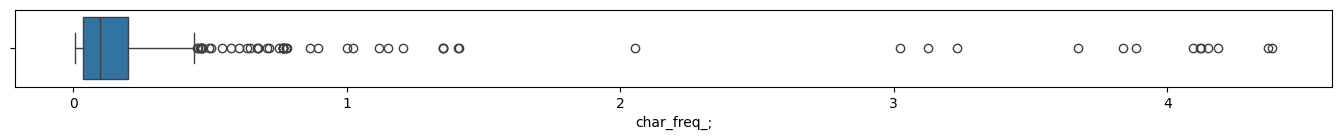

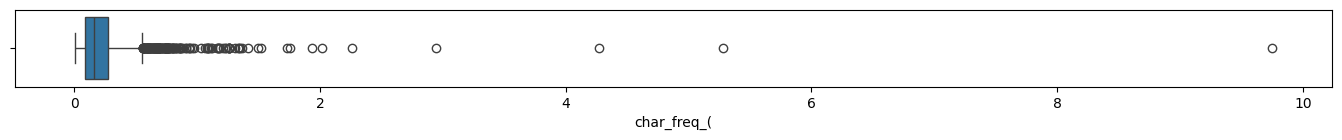

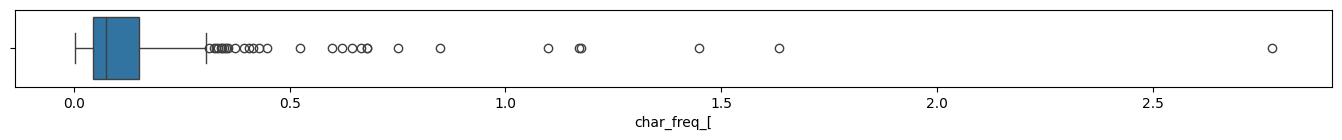

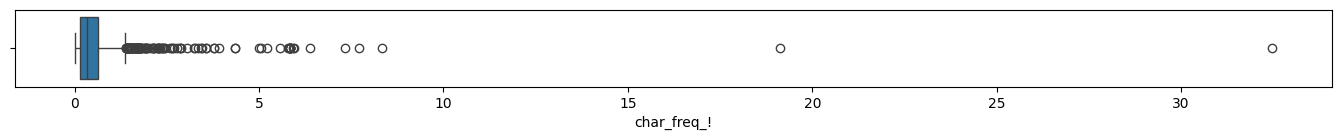

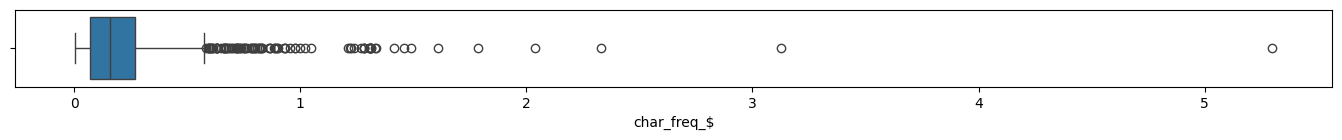

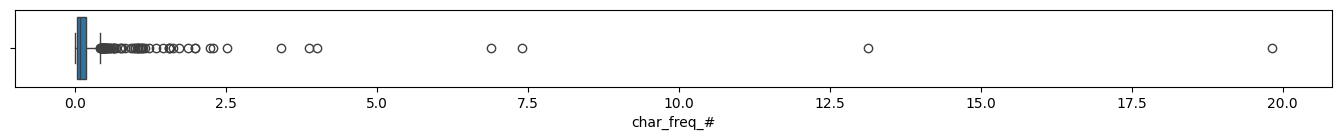

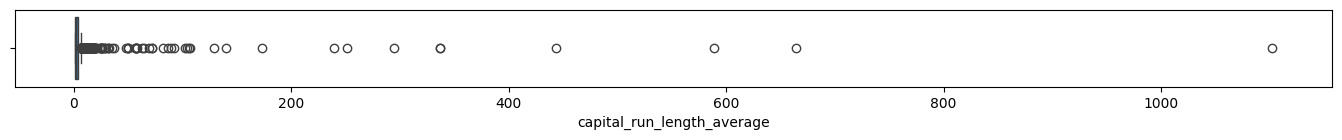

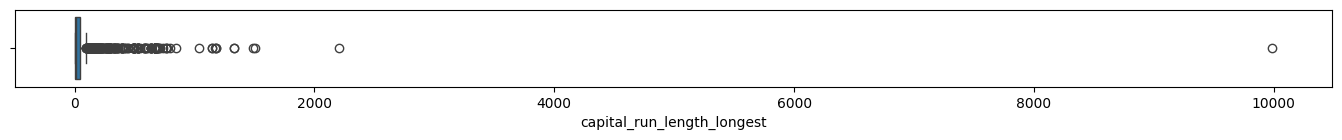

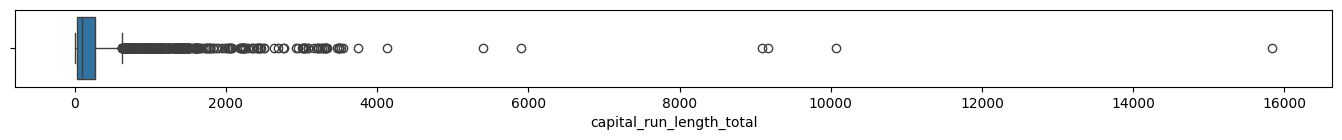

In [21]:
for i, column in enumerate(X):
    plt.figure(i, figsize=(17,1))
    sns.boxplot(data=X[X[column]>0], x=column)
plt.show()

In [45]:
outliers = pd.DataFrame(0, index=np.arange(len(X)), columns=X.columns)
outliers_sum = pd.Series(0, index=np.arange(len(X)))
for col in X.columns:
    q = X[X[col]>0][col].quantile(0.99)
    outliers[col] = X[col] > q
    outliers_sum |= X[col] > q
# number of outliers for each type
display(outliers.sum())
# total number of true values 
display(outliers.sum().sum())
# total number of outliers 
outliers_sum.sum()

word_freq_make                 8
word_freq_address              7
word_freq_all                 14
word_freq_3d                   1
word_freq_our                 14
word_freq_over                 8
word_freq_remove               7
word_freq_internet             7
word_freq_order                6
word_freq_mail                10
word_freq_receive              6
word_freq_will                18
word_freq_people               7
word_freq_report               3
word_freq_addresses            3
word_freq_free                10
word_freq_business             8
word_freq_email                8
word_freq_you                 25
word_freq_credit               4
word_freq_your                19
word_freq_font                 0
word_freq_000                  5
word_freq_money                6
word_freq_hp                   7
word_freq_hpl                  7
word_freq_george               4
word_freq_650                  4
word_freq_lab                  3
word_freq_labs                 3
word_freq_

458

377

<Axes: >

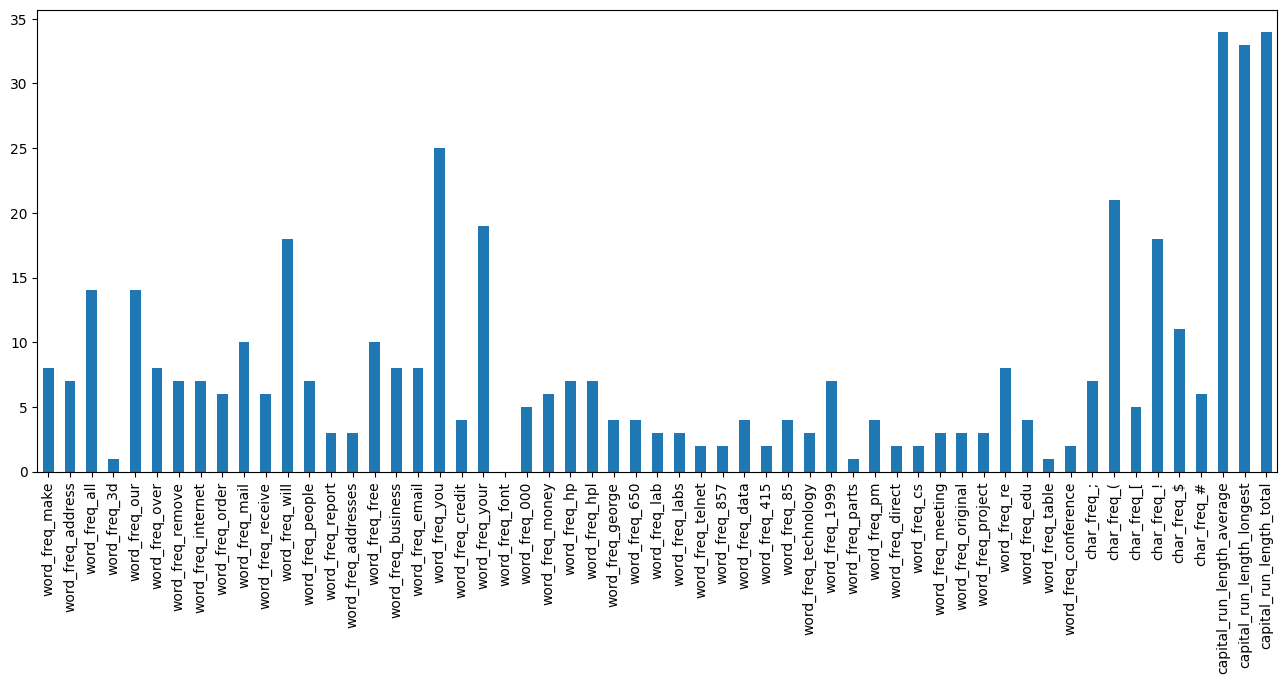

In [46]:
plt.figure(figsize=(16, 6))

outliers.sum().plot.bar()

In [24]:
outliers = pd.DataFrame(0, index=np.arange(len(X)), columns=X.columns)
outliers_sum = pd.Series(0, index=np.arange(len(X)))
for col in X.columns:
    q = X[X[col]>0][col].quantile(0.95)
    outliers[col] = X[col] > q
    outliers_sum |= X[col] > q
# total number of outliers 
outliers_sum.sum()

1466

In [26]:
outliers_sum.sum()/len(X)

0.3983695652173913